In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import the train Dataset:
- We Import the Dataset and take a quick look at 3 random rows:

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df.sample(5)

Dates        Category                          Descript  \
733429  2004-12-12 02:00:00   LARCENY/THEFT      GRAND THEFT FROM LOCKED AUTO   
499479  2008-05-01 04:10:00  OTHER OFFENSES                 TRAFFIC VIOLATION   
156530  2013-04-18 09:28:00         ROBBERY  ROBBERY ON THE STREET, STRONGARM   
488447  2008-06-27 10:00:00         ASSAULT                           BATTERY   
748941  2004-09-27 00:47:00   DRUG/NARCOTIC             POSSESSION OF COCAINE   

       DayOfWeek  PdDistrict      Resolution  \
733429    Sunday        PARK            NONE   
499479  Thursday   INGLESIDE   ARREST, CITED   
156530  Thursday    NORTHERN            NONE   
488447    Friday     MISSION            NONE   
748941    Monday  TENDERLOIN  ARREST, BOOKED   

                                 Address           X          Y  
733429            HAIGHT ST / CENTRAL AV -122.443650  37.770426  
499479              MISSION ST / 30TH ST -122.421971  37.742375  
156530        SACRAMENTO ST / VANNESS AV -122.422517  37.791289  
488447           2800 Block of BRYANT ST -122.408834  37.748961  
748941  CYRIL MAGNIN STORTH ST / EDDY ST -122.408495  37.784452

- Next we check the columns and their types:

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


Observations:
- The Dataset contains 878049 Observations of 9 Features
- the 'Dates' column is a String ( also it's plural >_> )
- We have Categorical Features: Category, DayOfWeek, PdDistrict, Resolution
- We have Geospatial Information: 'X' (Longitude) and 'Y' (Latitude)
- The 'Address' Column has some kind of structure

## The 'Dates' Column:

### Data Cleaning & Feature Engineering:

#### Check for missing values

In [4]:
train_df.Dates.isnull().any()

False

#### Check for typos by making sure that all values match a Regular Expression

In [5]:
train_df.Dates.str.match('\d\d\d\d-\d\d-\d\d').all()

True

#### First, let's rename the Column (all column names are singular except this one!)

In [6]:
train_df.rename(columns={'Dates': 'DateTime'}, inplace=True)
train_df.columns

Index(['DateTime', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

#### Now Let's parse the dates from String to Datetime

In [7]:
train_df.DateTime = pd.to_datetime(train_df.DateTime)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DateTime    878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


#### Create separate columns for 'Year', 'Month', 'Hour'

In [8]:
train_df['Year'] = train_df.DateTime.dt.year
train_df['Year'].sample(3)

614776    2006
60464     2014
106599    2013
Name: Year, dtype: int64

In [9]:
train_df['Month'] = train_df.DateTime.dt.month
train_df['Month'].sample(3)

187029    11
479312     8
589549     1
Name: Month, dtype: int64

In [10]:
train_df['Hour'] = train_df.DateTime.dt.hour
train_df['Hour'].sample(3)

240035    18
312134    18
760992    22
Name: Hour, dtype: int64

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DateTime    878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
 9   Year        878049 non-null  int64         
 10  Month       878049 non-null  int64         
 11  Hour        878049 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 80.4+ MB


#### Let's Check the range of Dates:

In [12]:
train_df.DateTime.min(), train_df.DateTime.max()

(Timestamp('2003-01-06 00:01:00'), Timestamp('2015-05-13 23:53:00'))

#### Encoding Month, DayOfWeek & Hour

In [18]:
train_df['MonthSin'] = np.sin((train_df.Month*2*np.pi)/12)
train_df['MonthCos'] = np.cos((train_df.Month*2*np.pi)/12)

In [19]:
train_df['DayOfWeekInt'] = train_df.DayOfWeek.map({
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
})
#Optional Task
train_df['DayOfWeekSin'] = np.sin((train_df.DayOfWeekInt*2*np.pi)/7)
train_df['DayOfWeekCos'] = np.cos((train_df.DayOfWeekInt*2*np.pi)/7)

In [20]:
train_df['HourSin'] = np.sin((train_df.Hour*2*np.pi)/24)
train_df['HourCos'] = np.cos((train_df.Hour*2*np.pi)/24)

In [21]:
train_df.sample(7)

DateTime           Category  \
518495 2008-01-23 04:30:00      LARCENY/THEFT   
434333 2009-04-01 19:00:00     OTHER OFFENSES   
638375 2006-04-21 22:00:00      LARCENY/THEFT   
81675  2014-04-15 11:49:00     OTHER OFFENSES   
165949 2013-03-05 12:58:00      DRUG/NARCOTIC   
836106 2003-07-24 16:16:00     MISSING PERSON   
191262 2012-10-30 12:00:00  RECOVERED VEHICLE   

                                           Descript  DayOfWeek  PdDistrict  \
518495                 PETTY THEFT FROM LOCKED AUTO  Wednesday     MISSION   
434333                    LOST/STOLEN LICENSE PLATE  Wednesday   INGLESIDE   
638375                 PETTY THEFT FROM LOCKED AUTO     Friday    SOUTHERN   
81675         DRIVERS LICENSE, SUSPENDED OR REVOKED    Tuesday    SOUTHERN   
165949  POSSESSION OF CONTROLLED SUBSTANCE FOR SALE    Tuesday  TENDERLOIN   
836106                                 FOUND PERSON   Thursday     TARAVAL   
191262        RECOVERED VEHICLE - STOLEN OUTSIDE SF    Tuesday   INGLESIDE   

            Resolution                      Address           X          Y  \
518495            NONE          BRYANT ST / 15TH ST -122.410612  37.766903   
434333            NONE       500 Block of JUDSON AV -122.453230  37.728562   
638375            NONE        11TH ST / HARRISON ST -122.412483  37.770631   
81675    ARREST, CITED      800 Block of MISSION ST -122.405493  37.783588   
165949  ARREST, BOOKED  100 Block of LEAVENWORTH ST -122.413893  37.782347   
836106            NONE          0 Block of JULES AV -122.461163  37.719125   
191262            NONE       400 Block of NAPLES ST -122.430686  37.721640   

        Year  Month  Hour  MonthSin      MonthCos  DayOfWeekInt  DayOfWeekSin  \
518495  2008      1     4  0.500000  8.660254e-01             3      0.433884   
434333  2009      4    19  0.866025 -5.000000e-01             3      0.433884   
638375  2006      4    22  0.866025 -5.000000e-01             5     -0.974928   
81675   2014      4    11  0.866025 -5.000000e-01             2      0.974928   
165949  2013      3    12  1.000000  6.123234e-17             2      0.974928   
836106  2003      7    16 -0.500000 -8.660254e-01             4     -0.433884   
191262  2012     10    12 -0.866025  5.000000e-01             2      0.974928   

        DayOfWeekCos       HourSin   HourCos  
518495     -0.900969  8.660254e-01  0.500000  
434333     -0.900969 -9.659258e-01  0.258819  
638375     -0.222521 -5.000000e-01  0.866025  
81675      -0.222521  2.588190e-01 -0.965926  
165949     -0.222521  1.224647e-16 -1.000000  
836106     -0.900969 -8.660254e-01 -0.500000  
191262     -0.222521  1.224647e-16 -1.000000

## Crimes per Year visualization:

In [22]:
gb = train_df.groupby('Year')['Descript'].count()
gb

Year
2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
Name: Descript, dtype: int64

Text(0, 0.5, 'Count of Crimes')

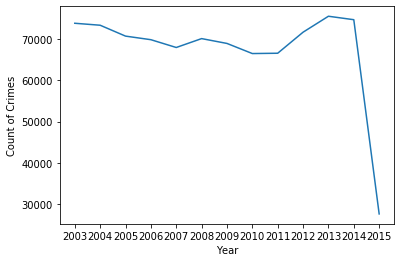

In [23]:
ax = gb.plot(kind='line', xticks=gb.index.values)
ax.set_ylabel('Count of Crimes')

#### We can see that Number of crimes in the last year (2015) is significantly lower, most probably because the data was collected before the year ended ( we'll check that later )

## Crimes per Day Of Week visualization:

#### Let's Check how many crimes are commited in each day

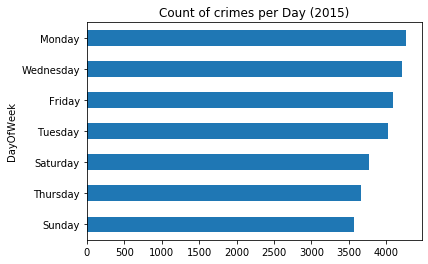

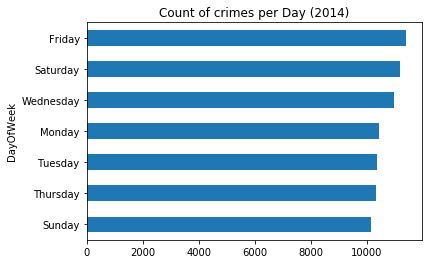

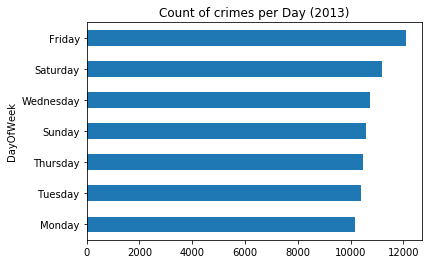

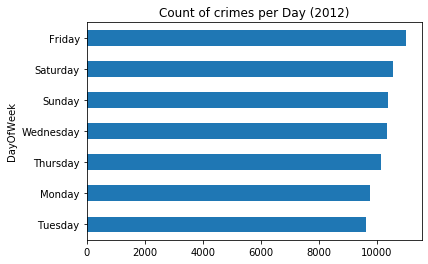

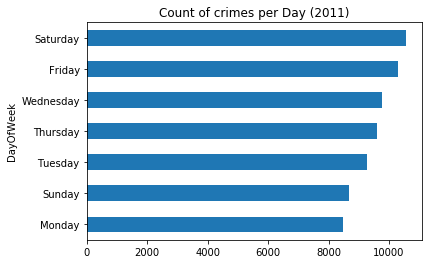

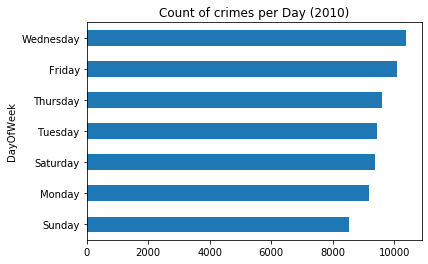

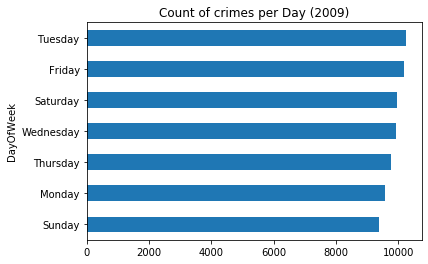

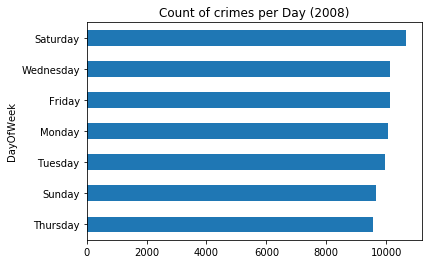

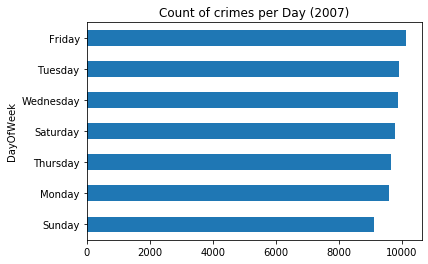

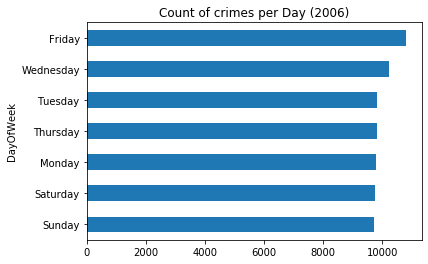

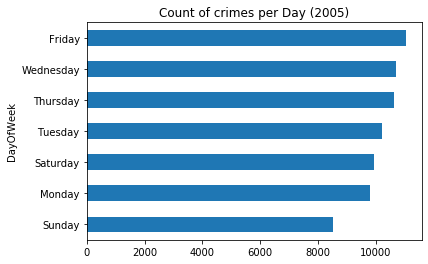

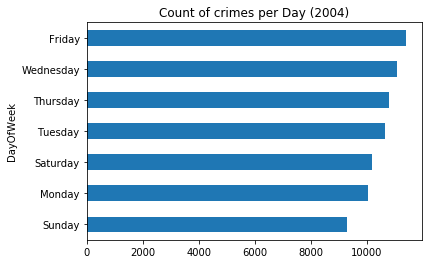

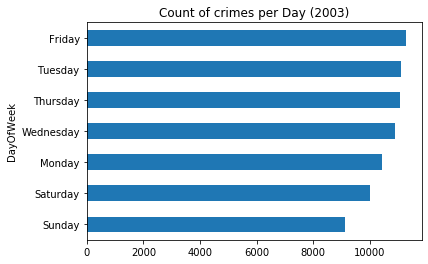

In [24]:
for y in train_df.Year.unique():
    train_df[train_df['Year'] == y].groupby('DayOfWeek')['Descript'].count().sort_values().plot(kind='barh', title=f'Count of crimes per Day ({y})', fig=(16,5))
    plt.show()

#### We notice that Friday almost always takes the top place.

## Crimes per Month visualization:

#### Let's Check if there are any patterns regarding the months :

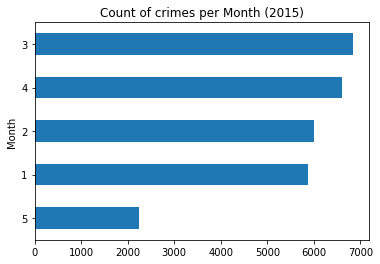

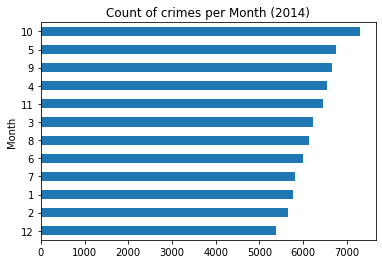

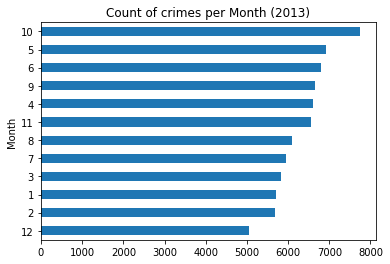

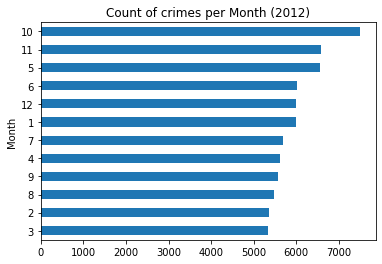

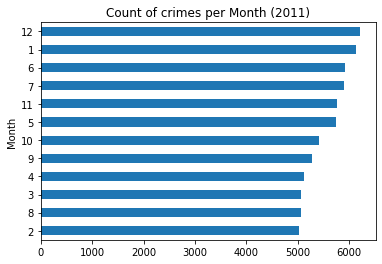

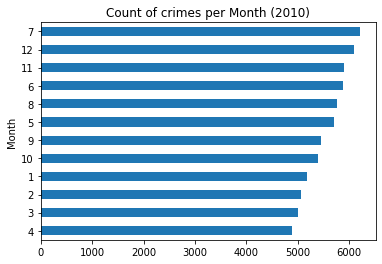

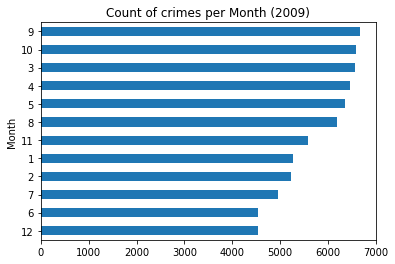

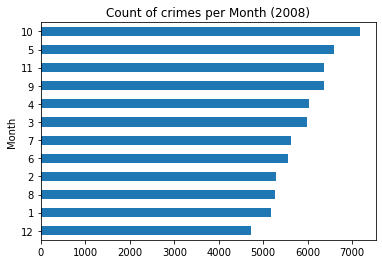

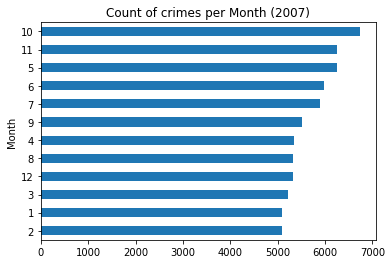

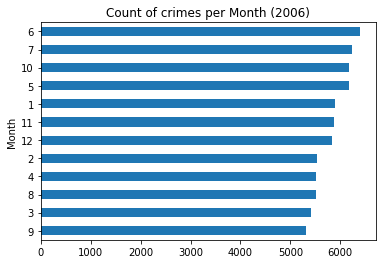

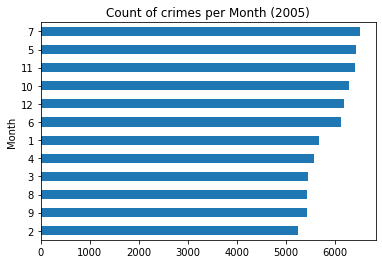

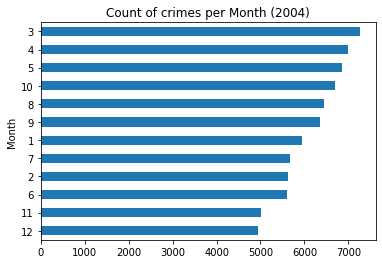

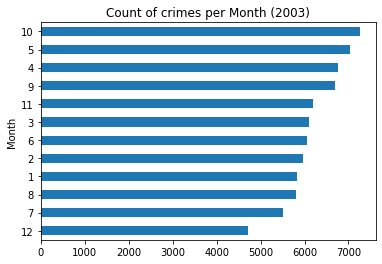

In [25]:
for y in train_df.Year.unique():
    train_df[train_df['Year'] == y].groupby('Month')['Descript'].count().sort_values().plot(kind='barh', title=f'Count of crimes per Month ({y})', fig=(16,5))
    plt.show()

#### We confirm that the data for year 2015 is incomplete ( only 5 months of data is present )

## Crimes per Hour of the Day Visualization:

#### One thing we can do is to group hours into easy to read time slots  ( of 4 hours ):
    - 16 ~ 20h
    - 20 ~ 00h
    - 01 ~ 04h
    - 04 ~ 08h
    - 08 ~ 12h
    - 12 ~ 16h
( We can later check which crimes are commited when :-) )

In [26]:
# Create a new Column TimeSlot

def get_timeslot(hour):
    if hour > 16 and hour <= 20:
        return '16h - 20h'
    elif hour > 20 or hour == 0:
        return '20h - 00h'
    elif hour > 0 and hour <= 4:
        return '00h - 04h'
    elif hour > 4 and hour <= 8:
        return '04h - 08h'
    elif hour > 8 and hour <= 12:
        return '08h - 12h'
    elif hour > 12 and hour <= 16:
        return '12h - 16h'
    else:
        return 'wtf'

train_df['TimeSlot']  = train_df.Hour.apply(get_timeslot)

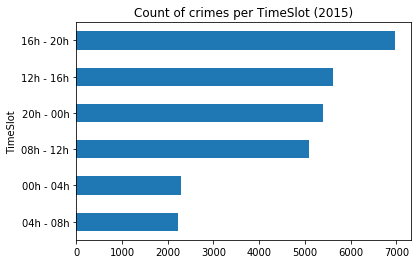

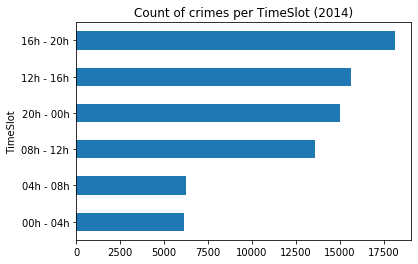

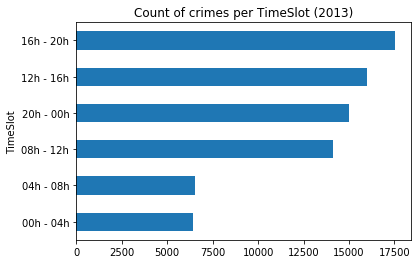

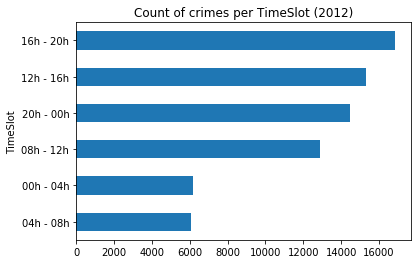

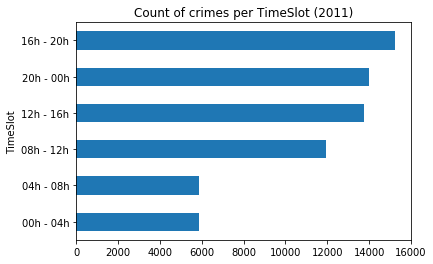

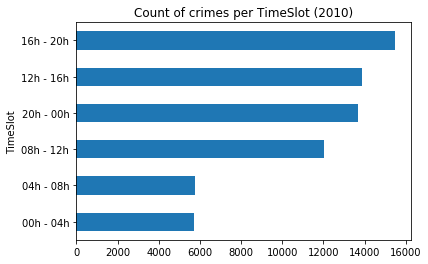

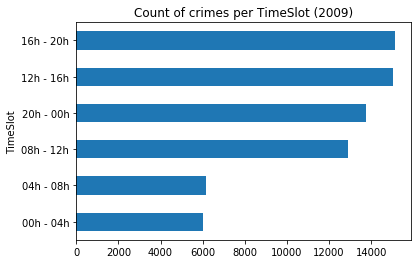

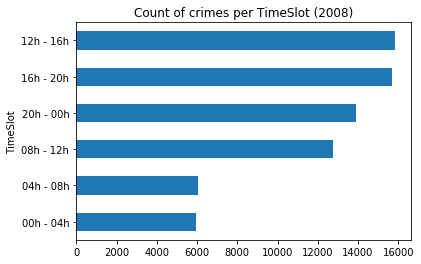

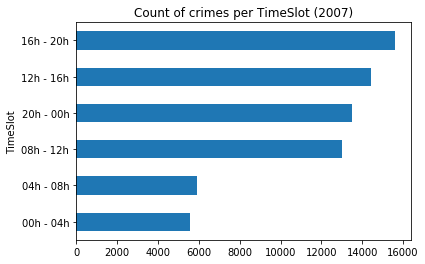

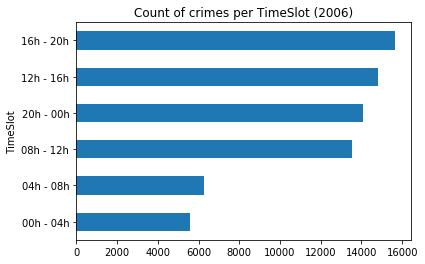

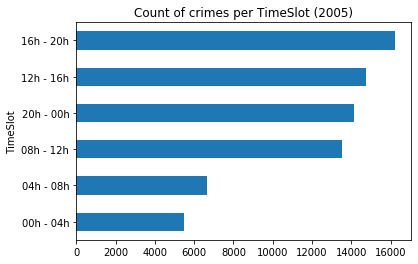

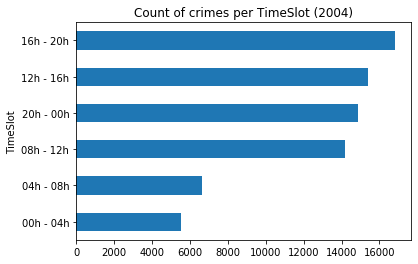

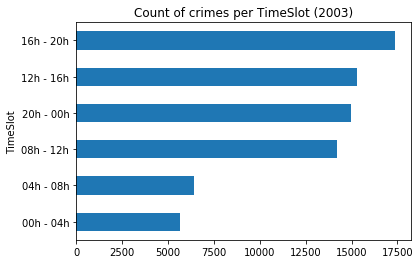

In [27]:
for y in train_df.Year.unique():
    train_df[train_df['Year'] == y].groupby('TimeSlot')['Descript'].count().sort_values().plot(kind='barh', title=f'Count of crimes per TimeSlot ({y})', fig=(18,7))
    plt.show()

#### We can see that in each year, the most of the crimes are commited between 16h and 20h, whereas fewer crimes are commited between 00h and 08h

In [28]:
train_df.to_csv('data/train_clean_1.csv',index=False)
print('Done Outputing')

Done Outputing


In [29]:
train_df1 = pd.read_csv('./data/train_clean_1.csv')
train_df1.sample(3)

DateTime   Category                       Descript  \
558090  2007-06-28 10:03:00   WARRANTS                 WARRANT ARREST   
644380  2006-03-23 18:00:00  VANDALISM  MALICIOUS MISCHIEF, VANDALISM   
850571  2003-05-14 17:35:00   WARRANTS                 WARRANT ARREST   

        DayOfWeek  PdDistrict      Resolution                    Address  \
558090   Thursday  TENDERLOIN  ARREST, BOOKED      100 Block of JONES ST   
644380   Thursday     TARAVAL            NONE      1300 Block of 30TH AV   
850571  Wednesday   INGLESIDE  ARREST, BOOKED  900 Block of ELLSWORTH ST   

                 X          Y  Year  Month  Hour      MonthSin      MonthCos  \
558090 -122.412250  37.782556  2007      6    10  1.224647e-16 -1.000000e+00   
644380 -122.488912  37.762091  2006      3    18  1.000000e+00  6.123234e-17   
850571 -122.416517  37.733010  2003      5    17  5.000000e-01 -8.660254e-01   

        DayOfWeekInt  DayOfWeekSin  DayOfWeekCos   HourSin       HourCos  \
558090             4     -0.433884     -0.900969  0.500000 -8.660254e-01   
644380             4     -0.433884     -0.900969 -1.000000 -1.836970e-16   
850571             3      0.433884     -0.900969 -0.965926 -2.588190e-01   

         TimeSlot  
558090  08h - 12h  
644380  16h - 20h  
850571  16h - 20h

#### Another nice feature to have, is whether it's night or day. We'll create a new binary column for it, where 1 is Day and 0 is Night

In [30]:
# Create IsDay Column
train_df1['IsDay']  = train_df1.Hour.apply(lambda x: 1 if (x > 7 and x < 20) else 0)

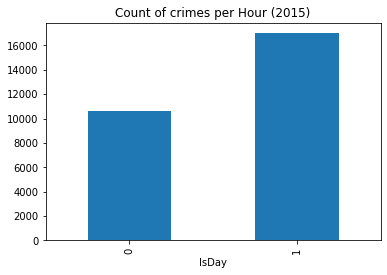

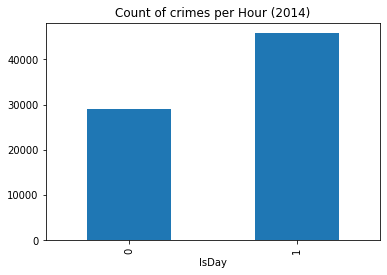

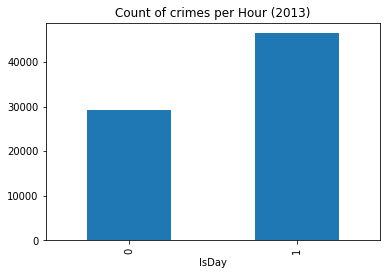

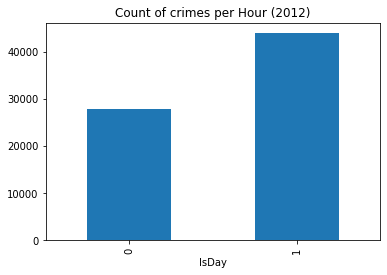

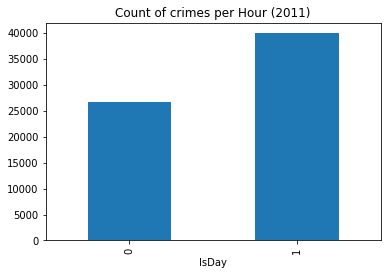

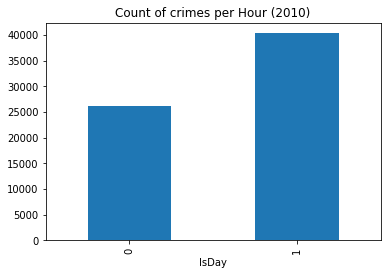

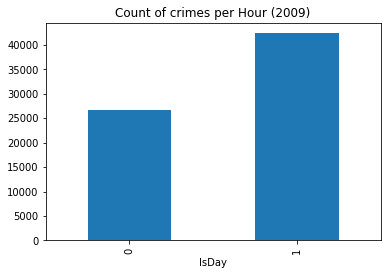

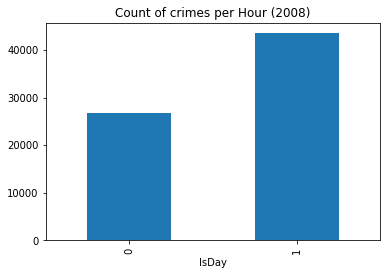

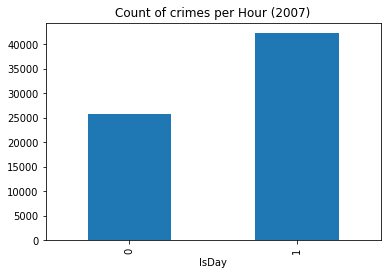

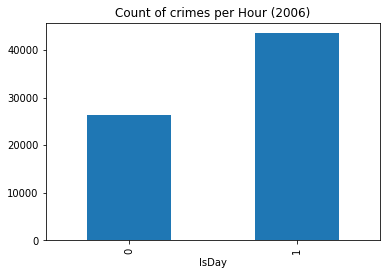

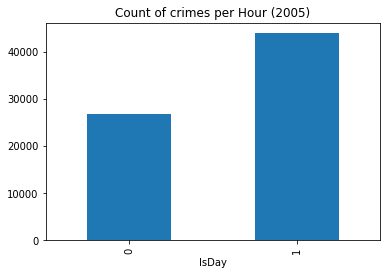

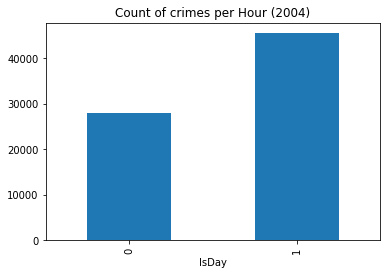

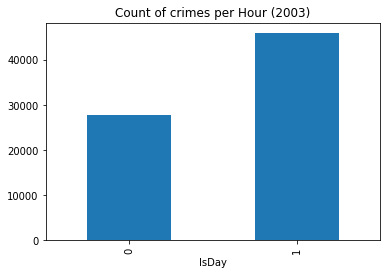

In [31]:
for y in train_df1.Year.unique():
    ax = train_df1[train_df1['Year'] == y].groupby('IsDay')['Descript'].count().sort_values().plot(kind='bar', title=f'Count of crimes per Hour ({y})', fig=(18,7))
    plt.show()

#### We can see that most of the crimes occur by day, but that doesn't mean much for now. We shall see next, after we include the category of the crime, which crimes most occur by day/night.

- We can see that there are in total **39 unique values** this column can take

- Let's see how many crimes there are in each category to get a glimpse of the distribution :

In [32]:
gb = (train_df1.groupby('Category')['Descript'].count()/len(train_df))*100
assert int(gb.sum()) == 100
gb.sort_values(inplace=True)
gb

Category
TREA                            0.000683
PORNOGRAPHY/OBSCENE MAT         0.002506
GAMBLING                        0.016628
SEX OFFENSES NON FORCIBLE       0.016856
EXTORTION                       0.029156
BRIBERY                         0.032914
BAD CHECKS                      0.046239
FAMILY OFFENSES                 0.055919
SUICIDE                         0.057856
EMBEZZLEMENT                    0.132794
LOITERING                       0.139514
ARSON                           0.172314
LIQUOR LAWS                     0.216731
RUNAWAY                         0.221628
DRIVING UNDER THE INFLUENCE     0.258300
KIDNAPPING                      0.266614
RECOVERED VEHICLE               0.357383
DRUNKENNESS                     0.487444
DISORDERLY CONDUCT              0.492000
SEX OFFENSES FORCIBLE           0.499744
STOLEN PROPERTY                 0.517055
TRESPASS                        0.834350
PROSTITUTION                    0.852344
WEAPON LAWS                     0.974319
SECONDA

#### We can clearly see that 15 of the categories account for ~93% of the crimes ! ( whereas the remaining 24 categories account only for ~7% )
- Let's make a quick visualization :

Text(0.5, 0, 'Crime Percentage')

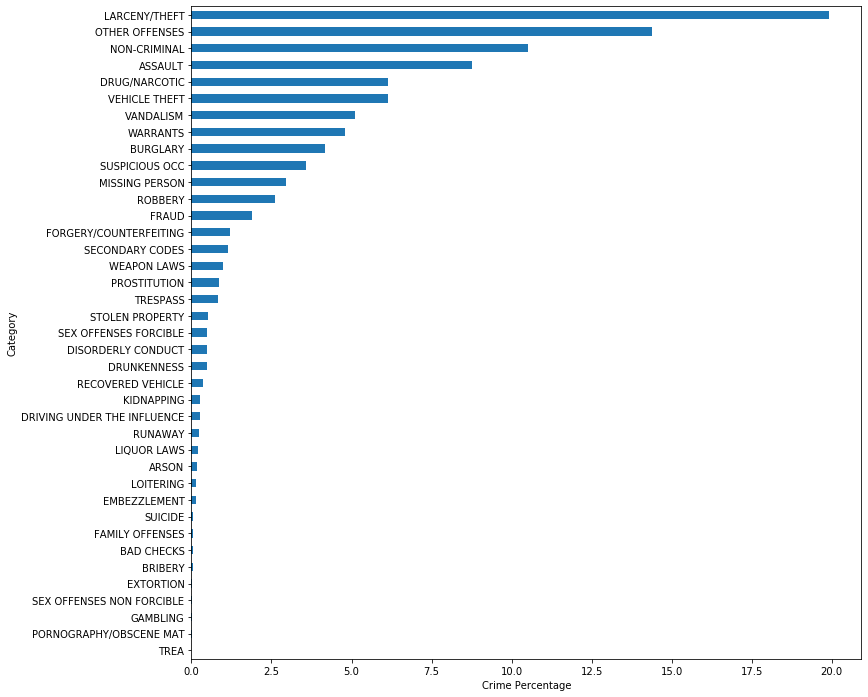

In [33]:
ax = gb.plot(kind='barh', figsize=(12,12) )
ax.set_xlabel('Crime Percentage')

#### Let's confirm if the same categories are always in the top each year

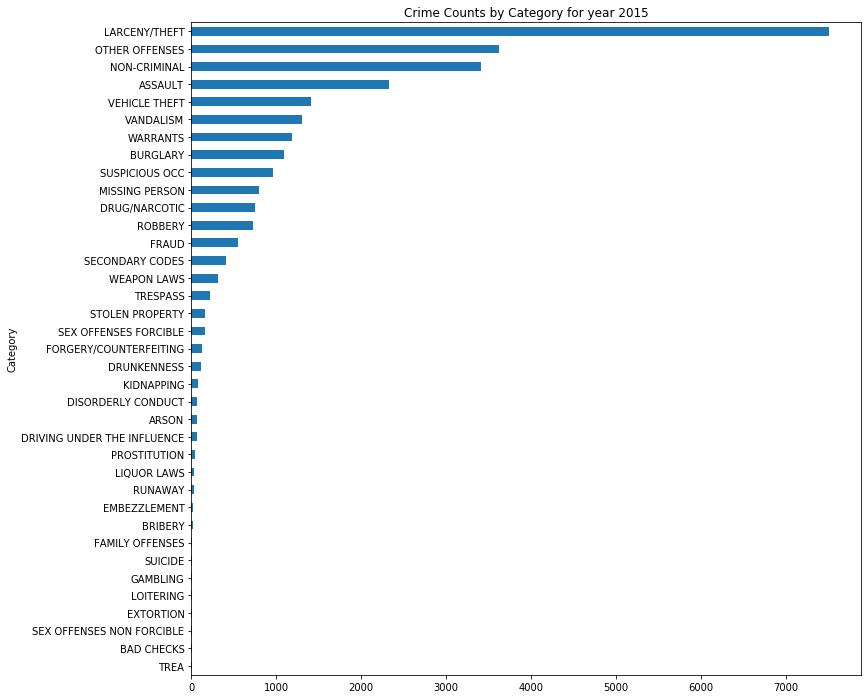

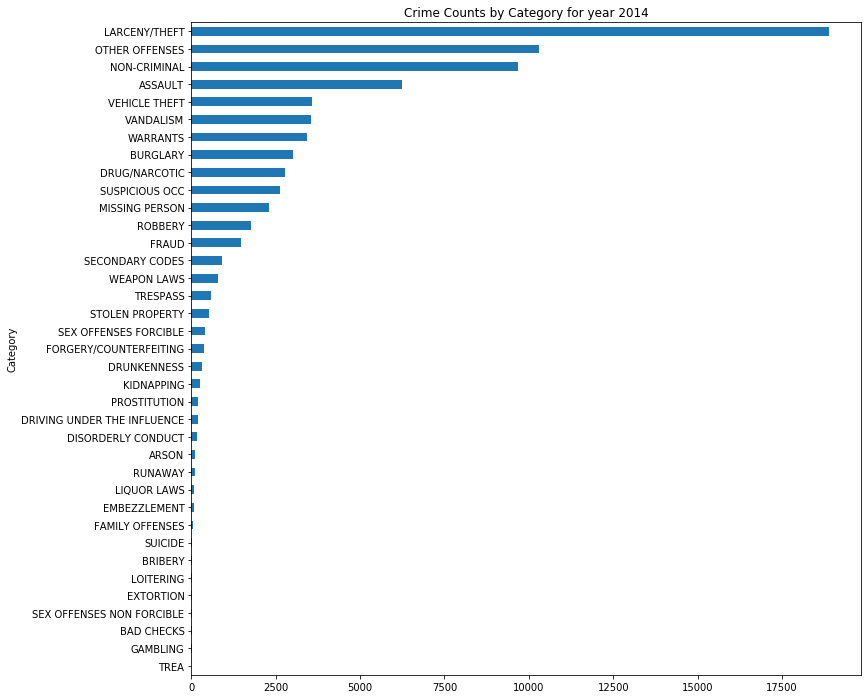

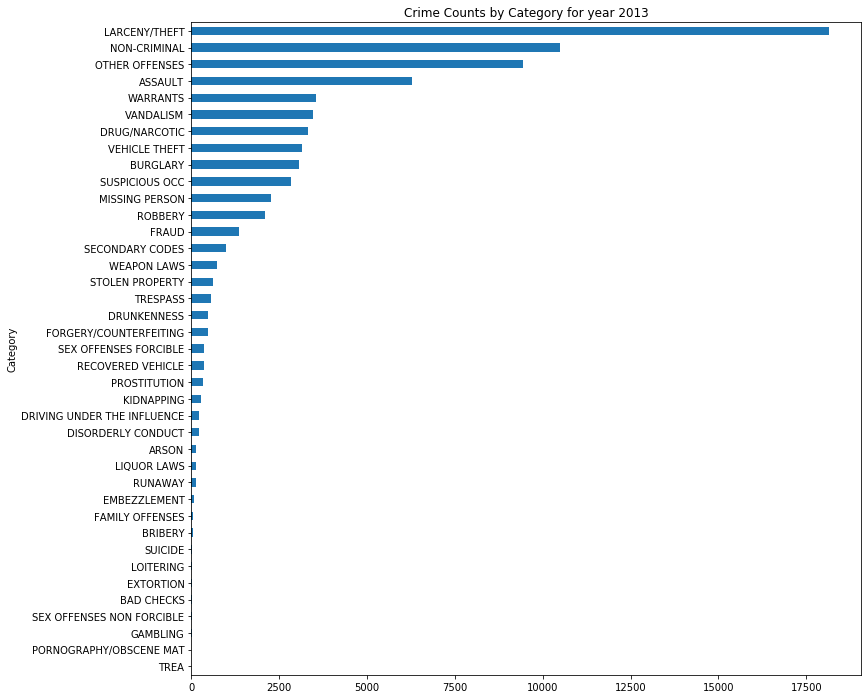

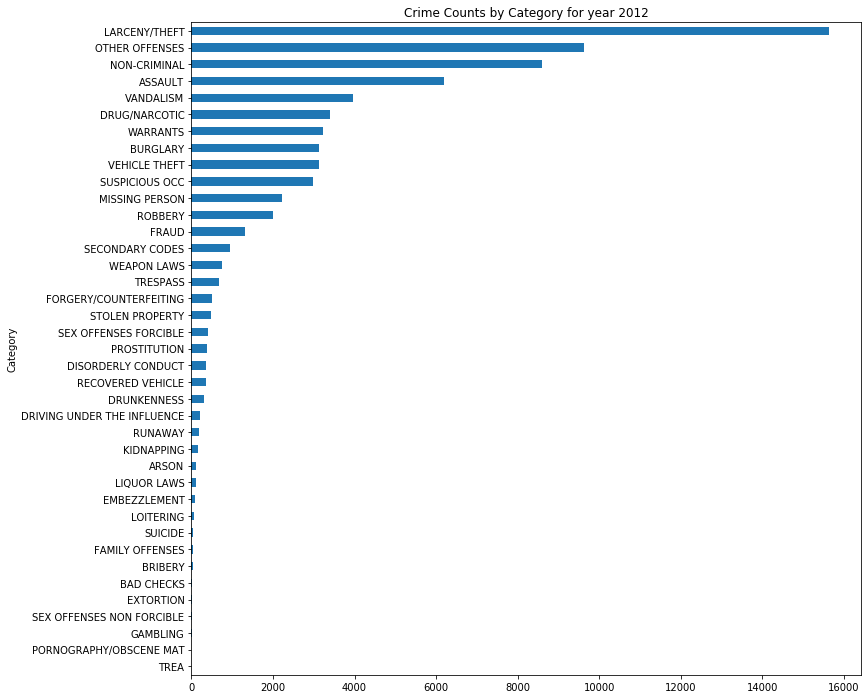

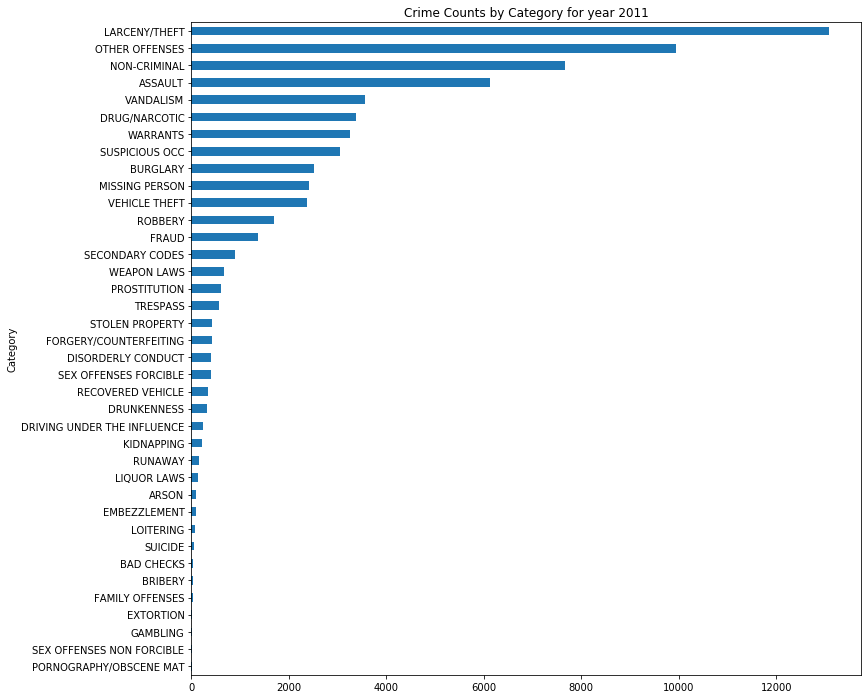

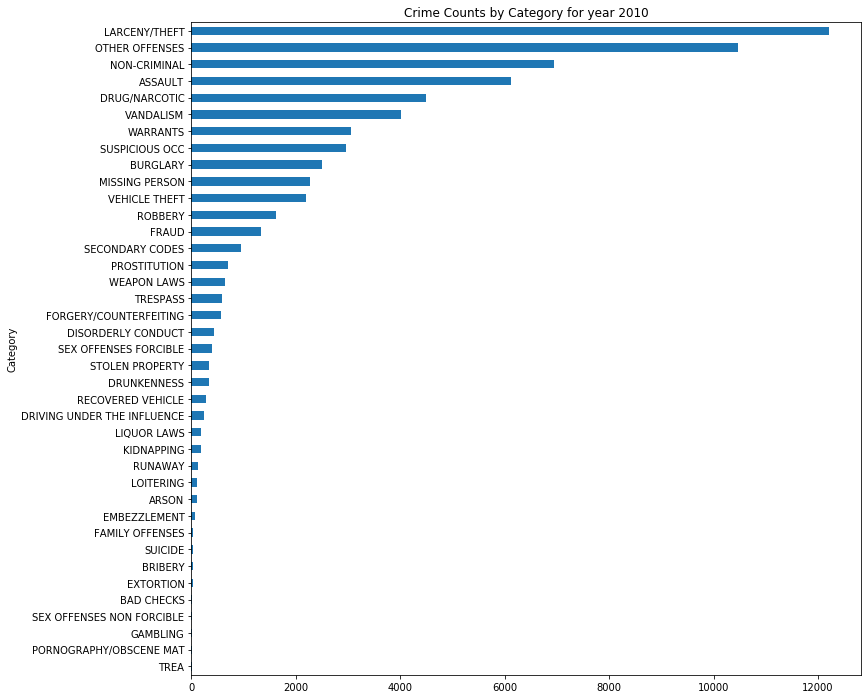

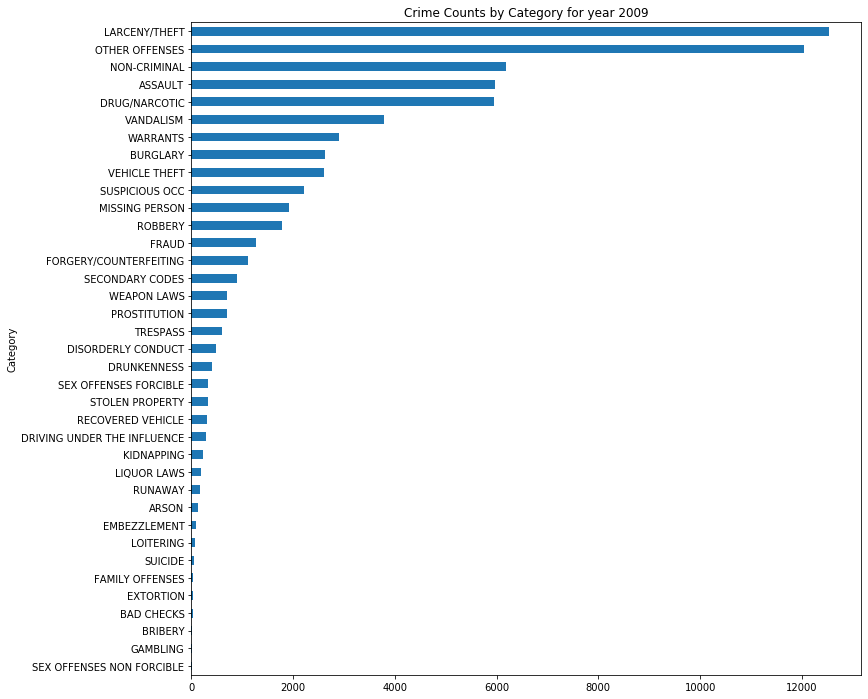

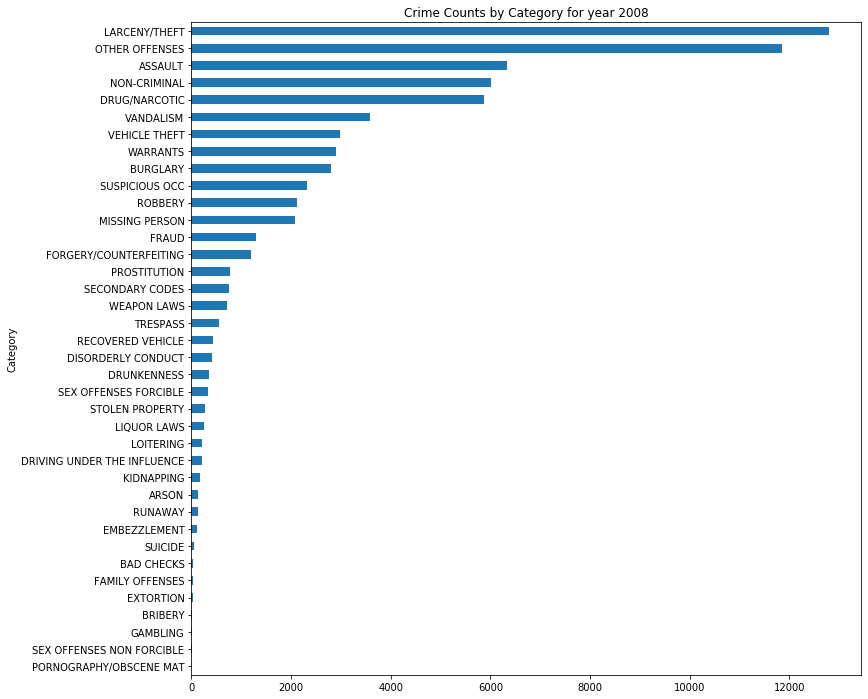

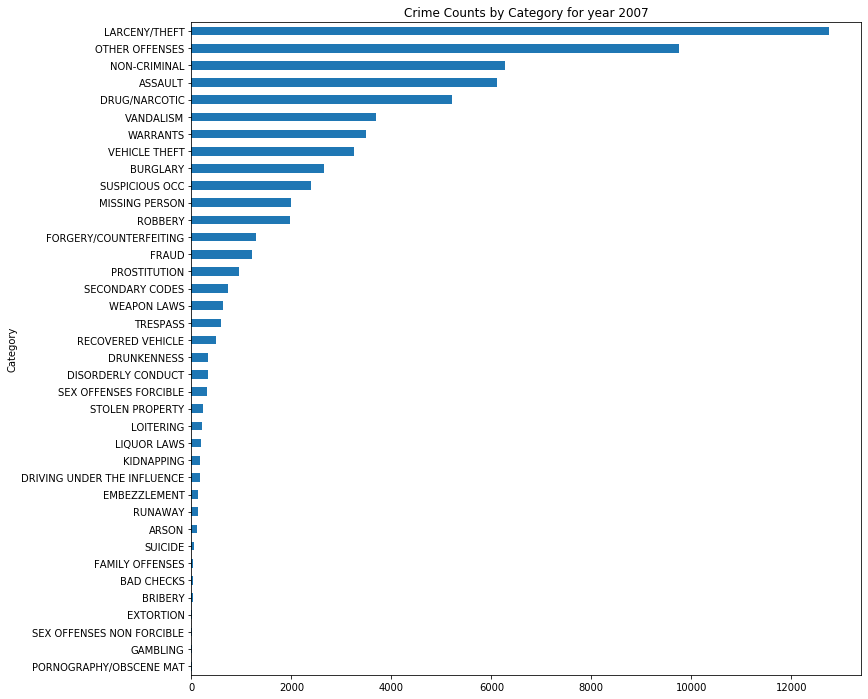

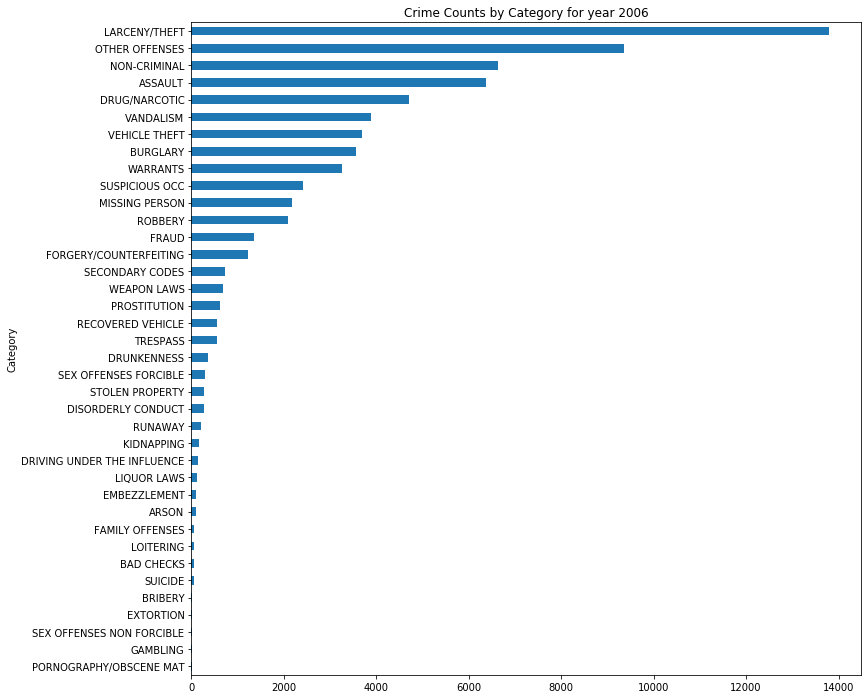

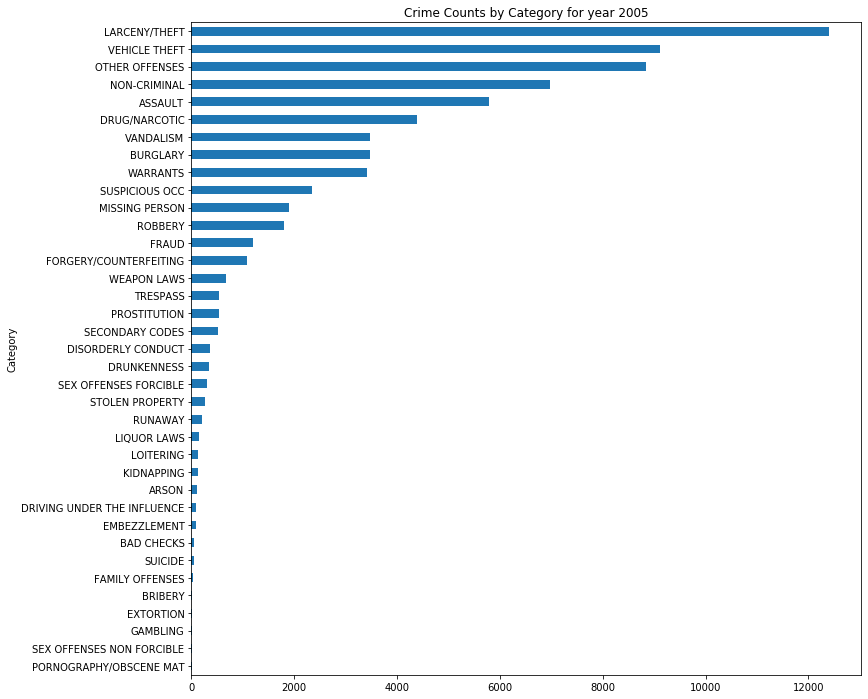

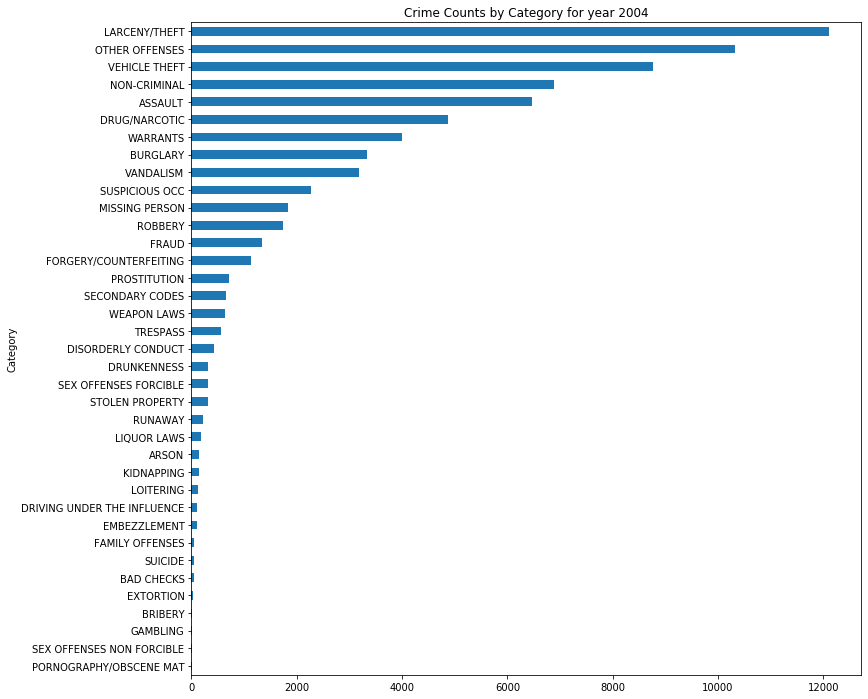

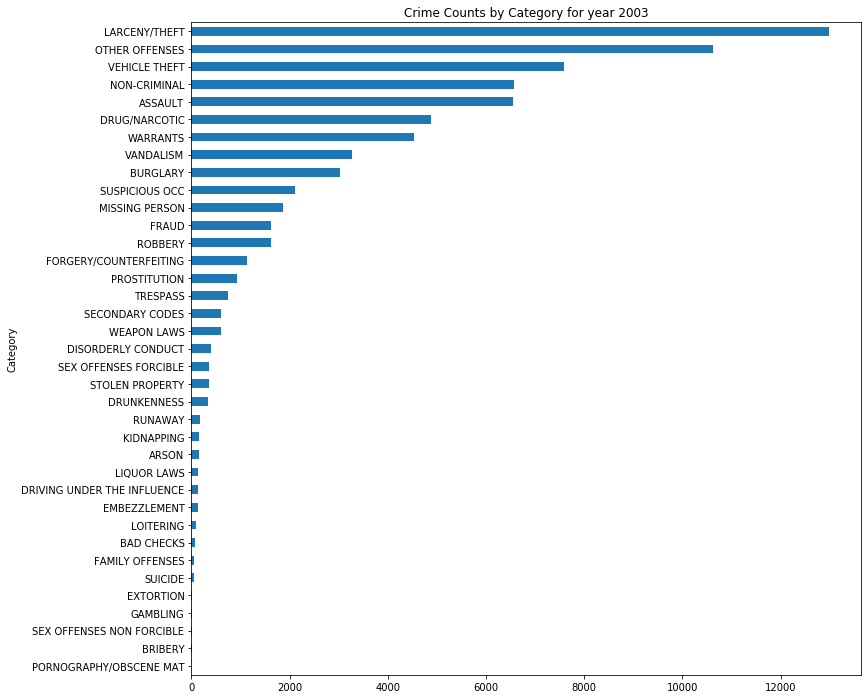

In [34]:
all_years = train_df1.Year.unique()
for y in all_years:
    gb = train_df1[train_df1.Year == y].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(12,12), title=f'Crime Counts by Category for year {y}')
    plt.show()

### Crime Categories by Day Of Week

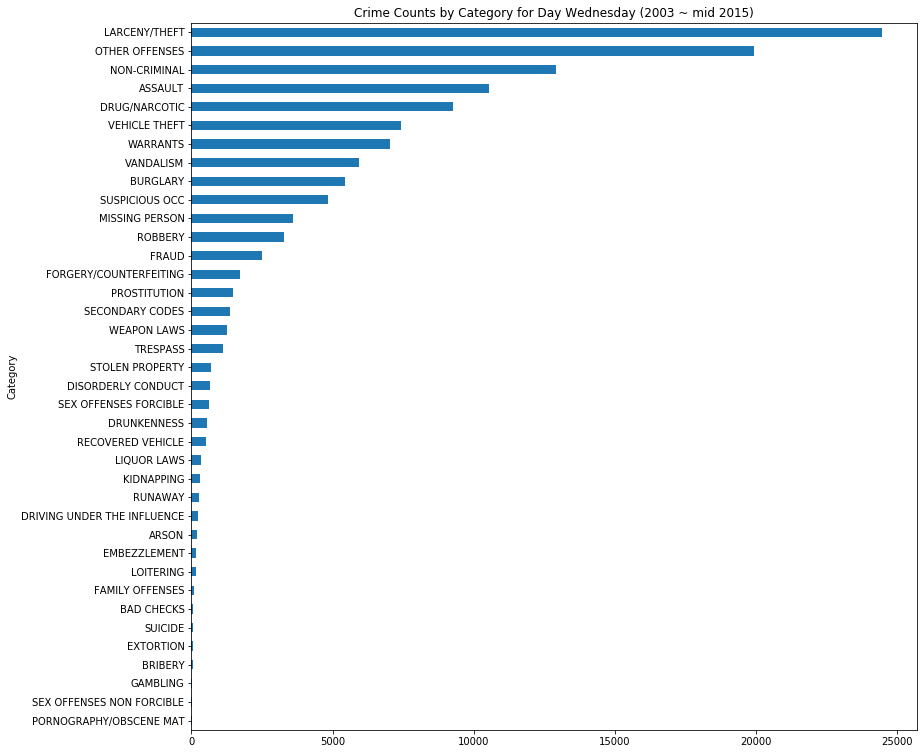

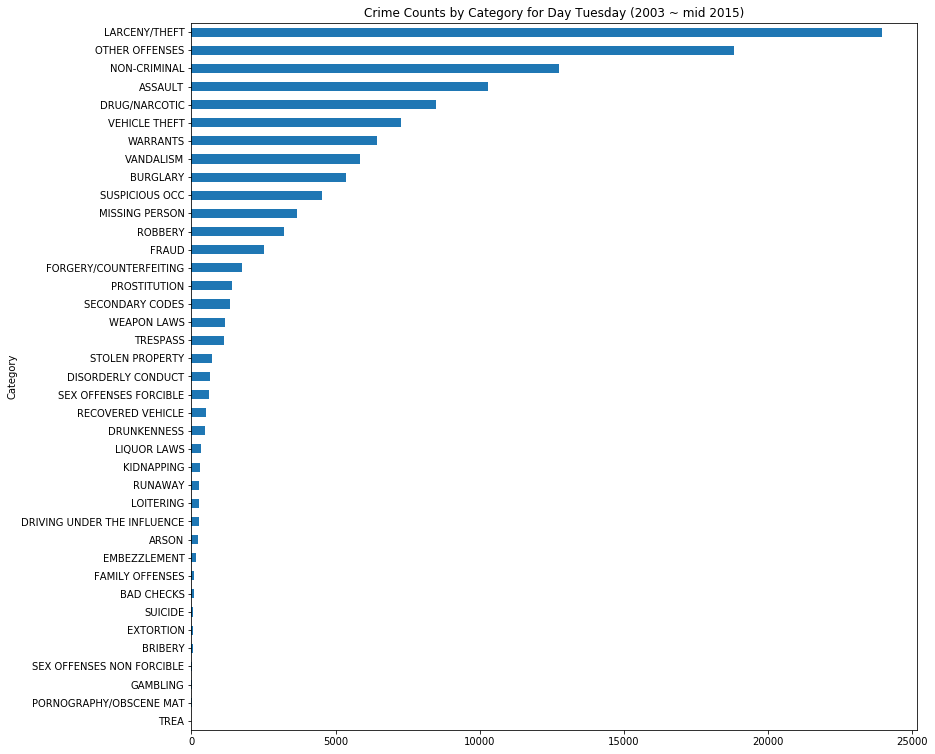

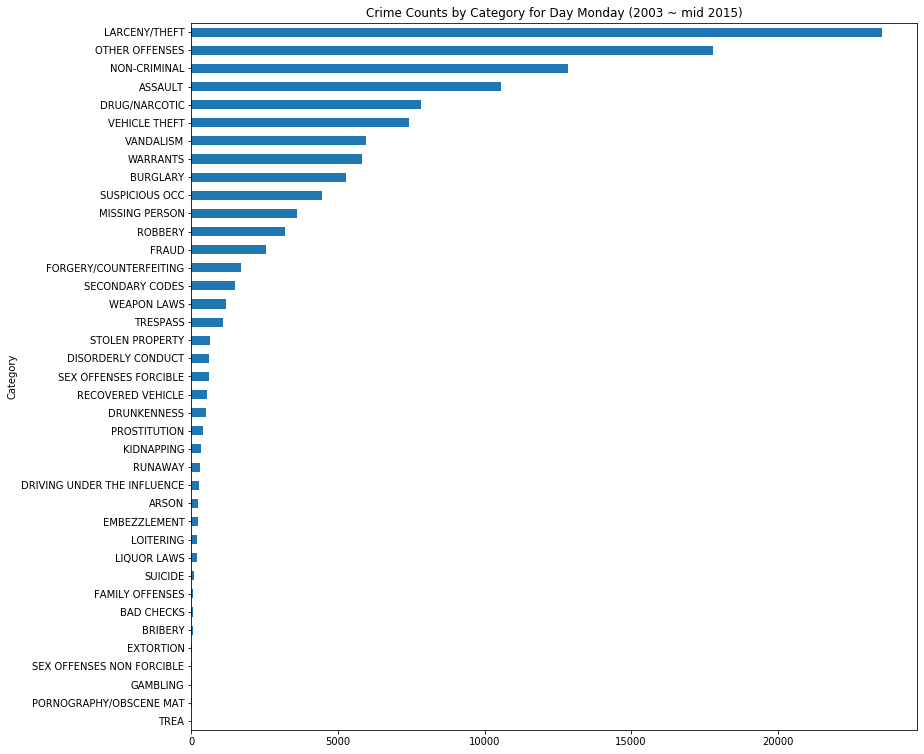

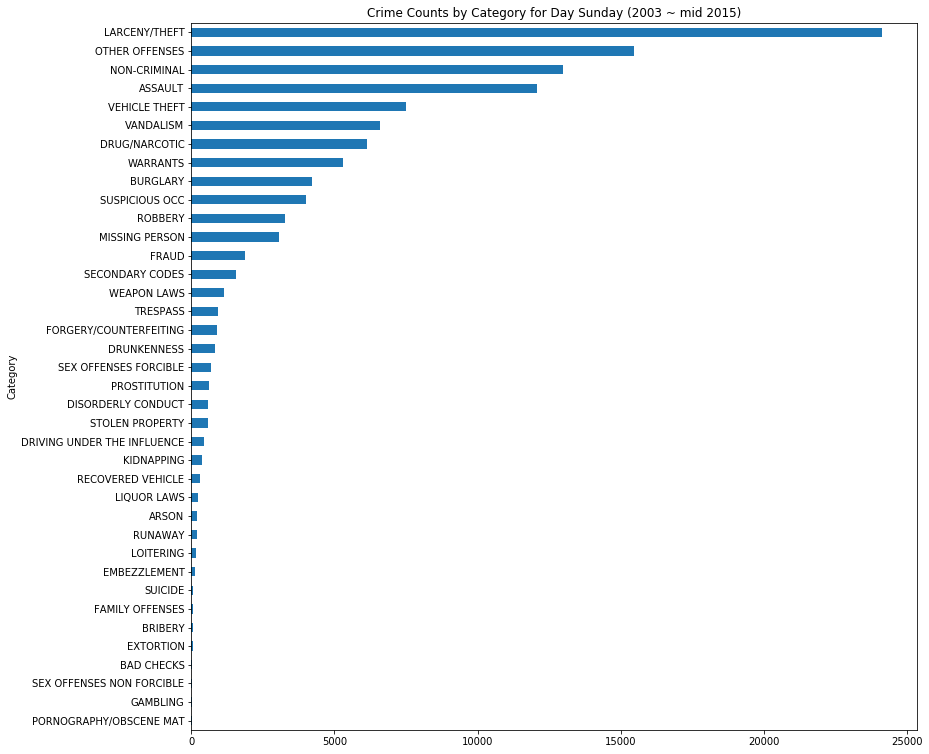

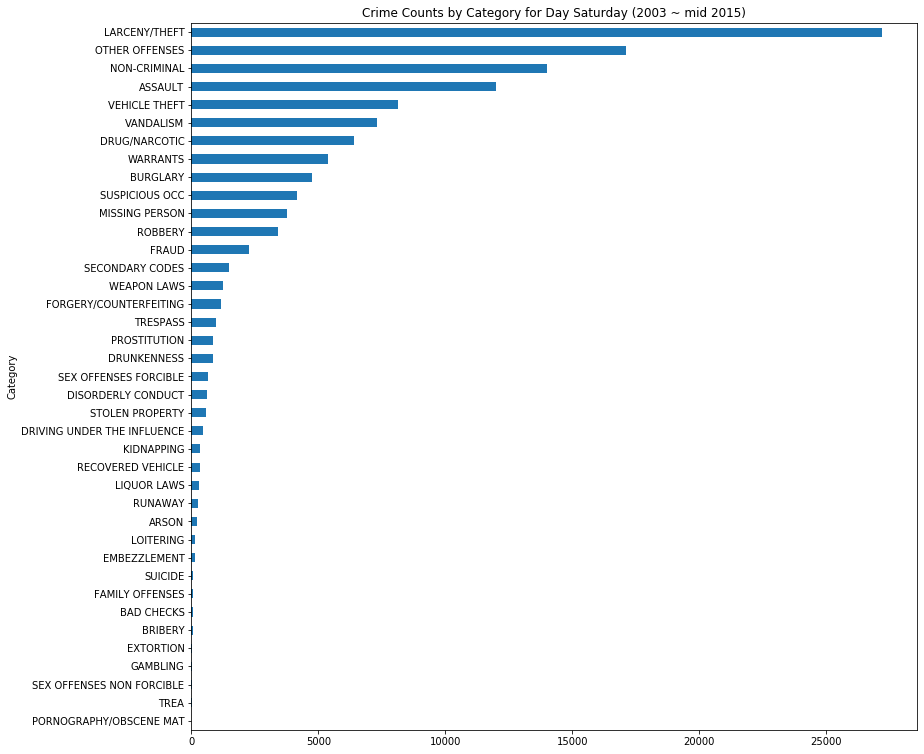

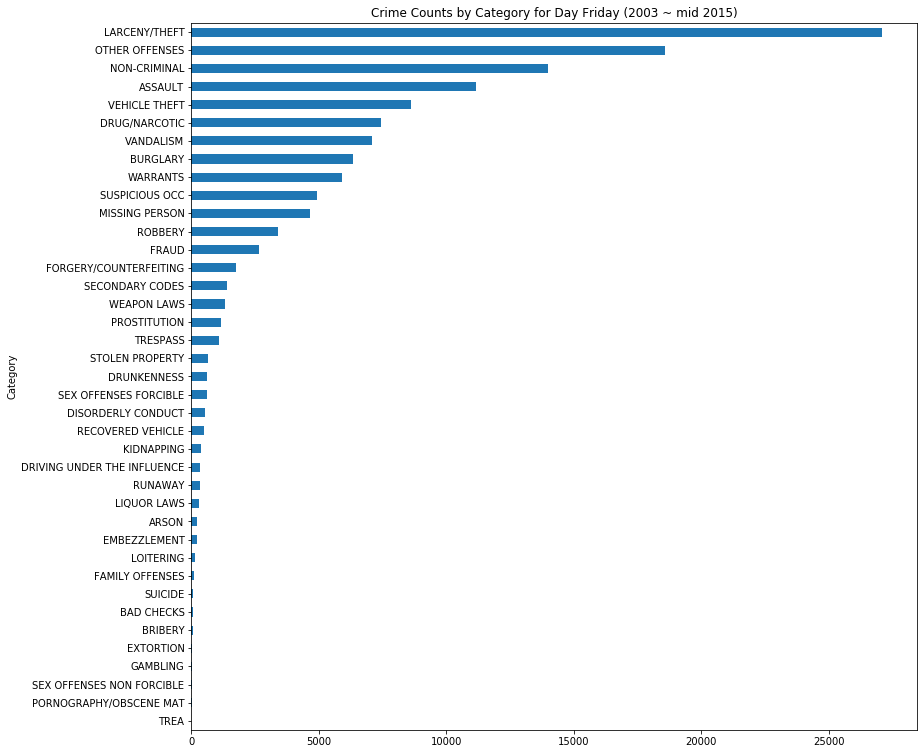

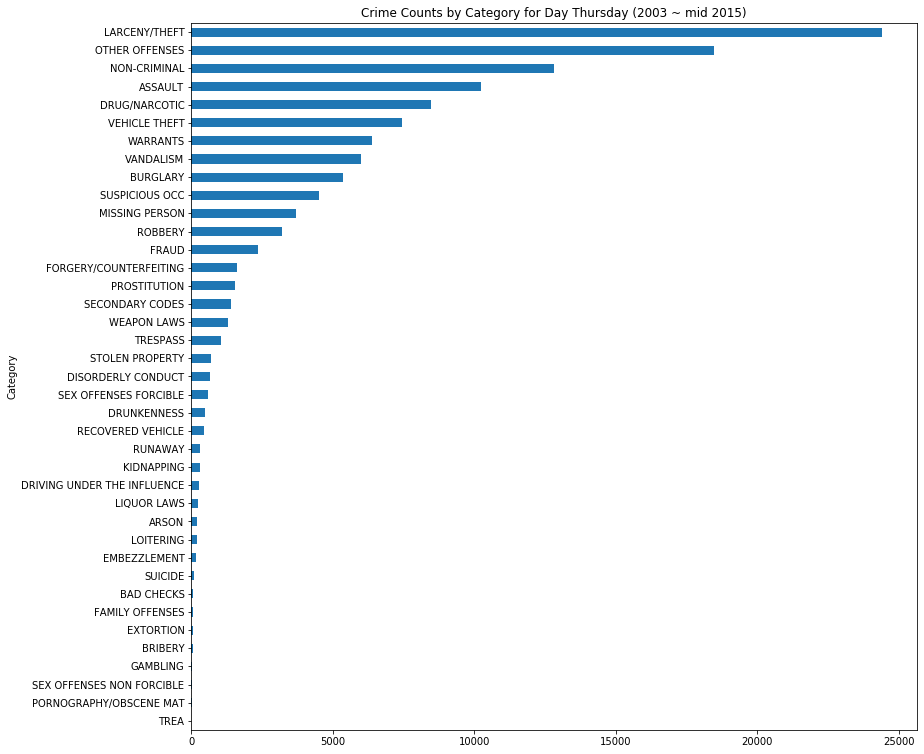

In [35]:
all_days_of_week = train_df1.DayOfWeek.unique()
for d in all_days_of_week:
    gb = train_df1[train_df1.DayOfWeek == d].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(13,13), title=f'Crime Counts by Category for Day {d} (2003 ~ mid 2015)')
    plt.show()

### Crime Categories Day vs Night

- An interesting to see, is which crimes occur mostly **by day vs by night**

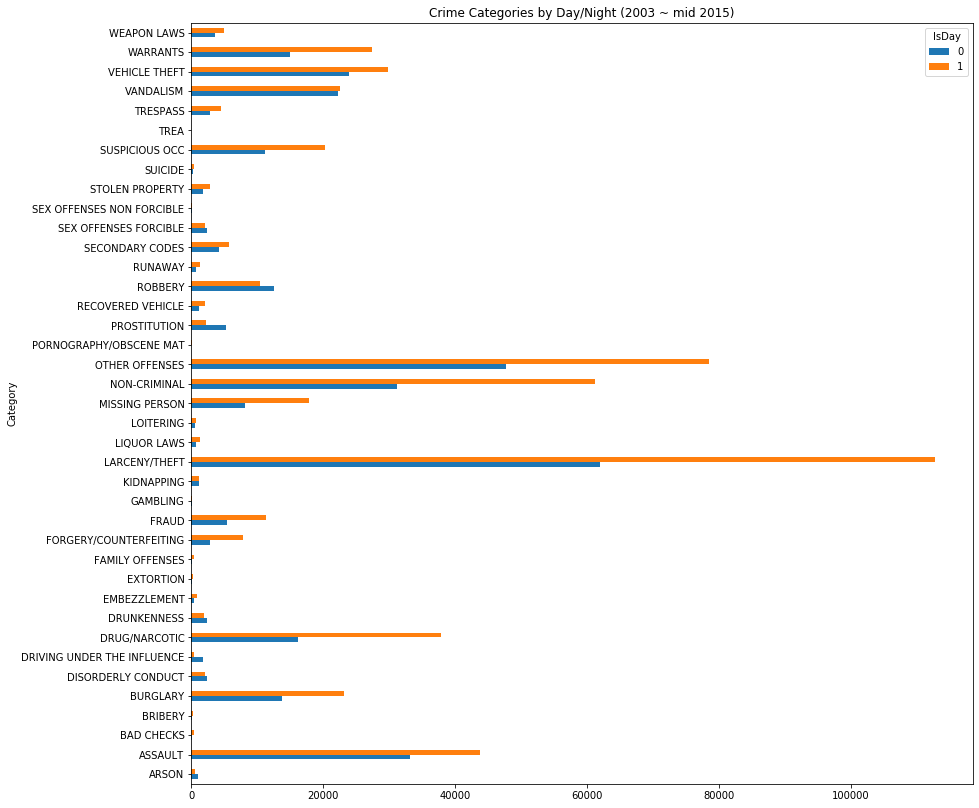

In [36]:
ct = pd.crosstab(train_df1.Category, train_df1.IsDay)
ct.plot(kind='barh', figsize=(14,14), title=f'Crime Categories by Day/Night (2003 ~ mid 2015)')

#### Let's check the same thing for each year

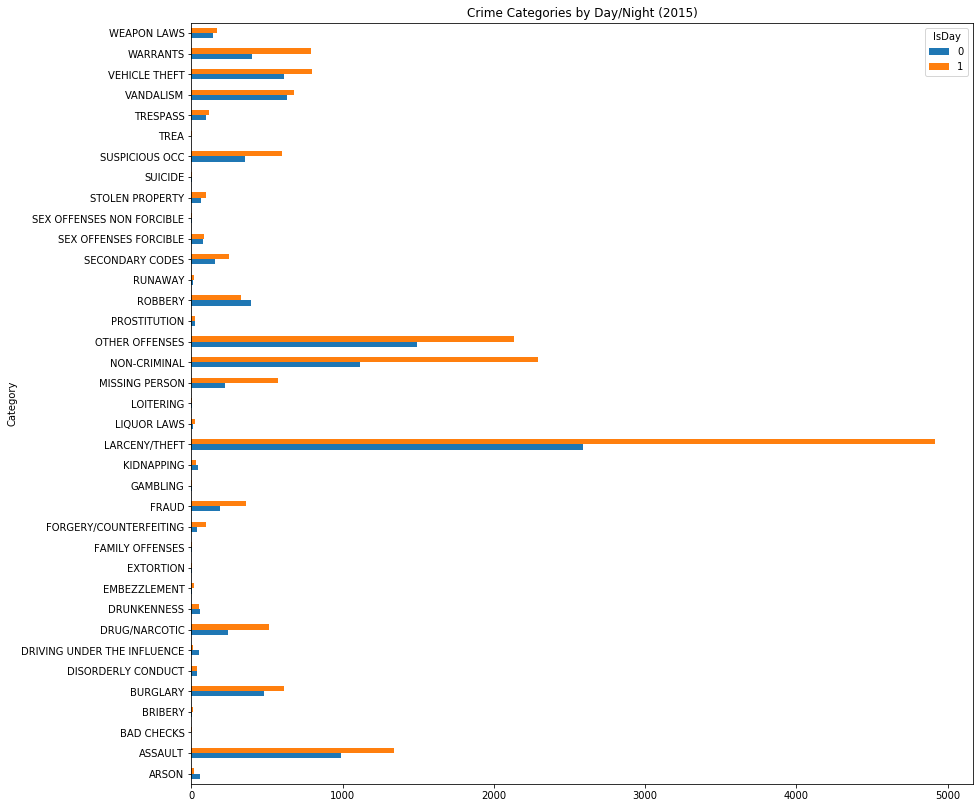

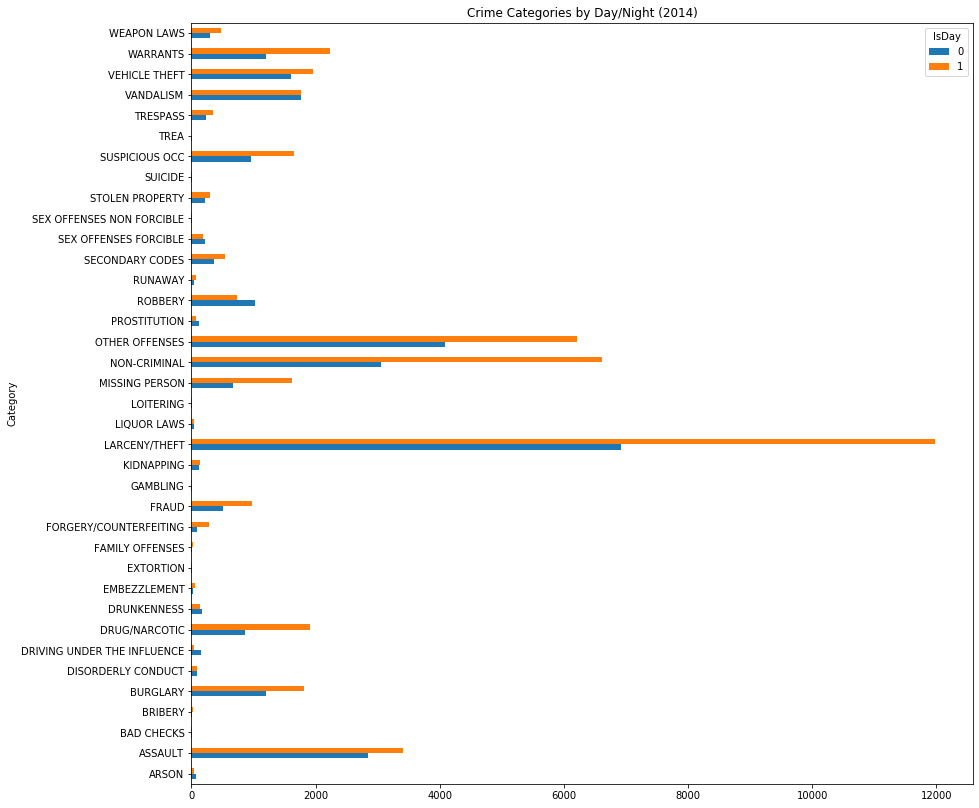

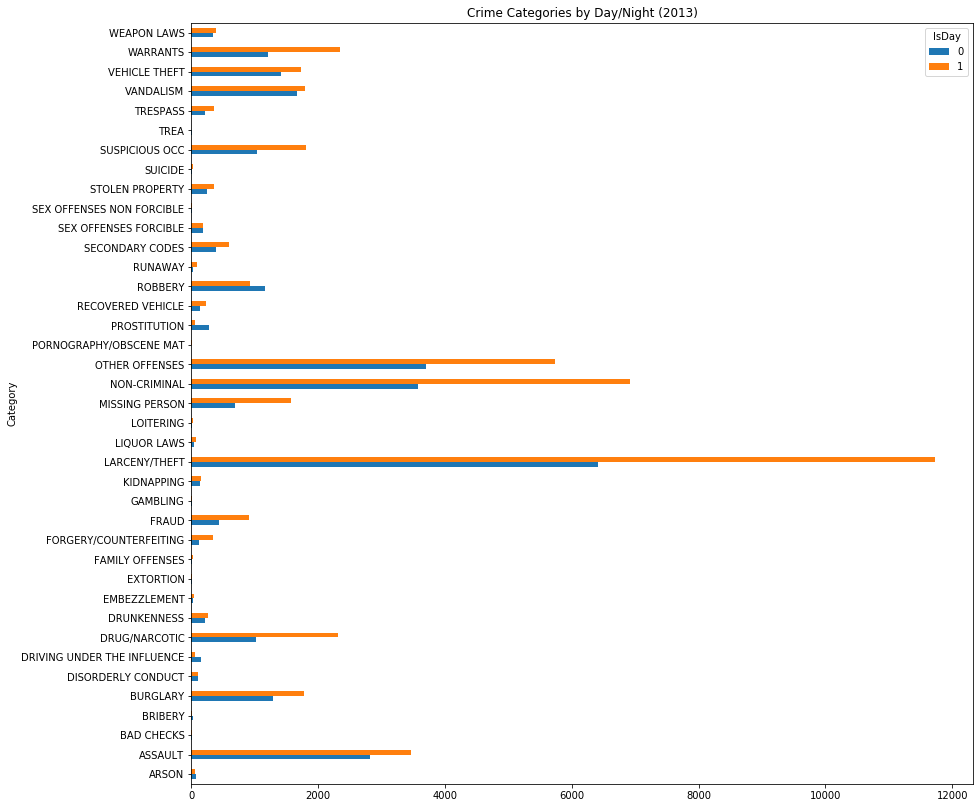

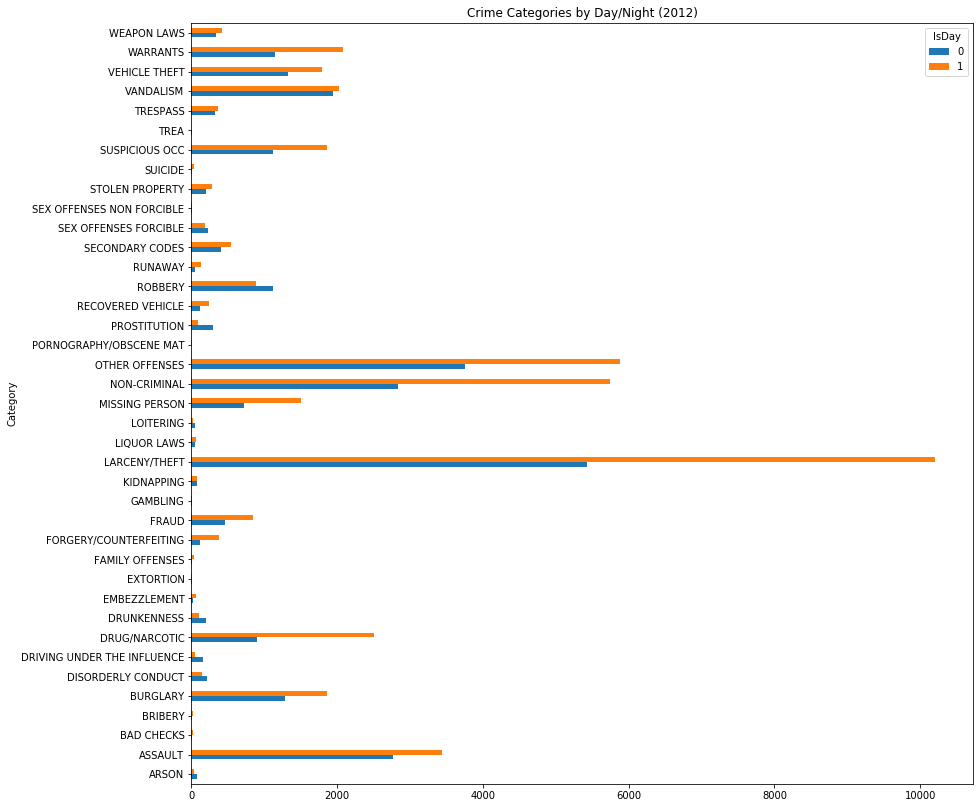

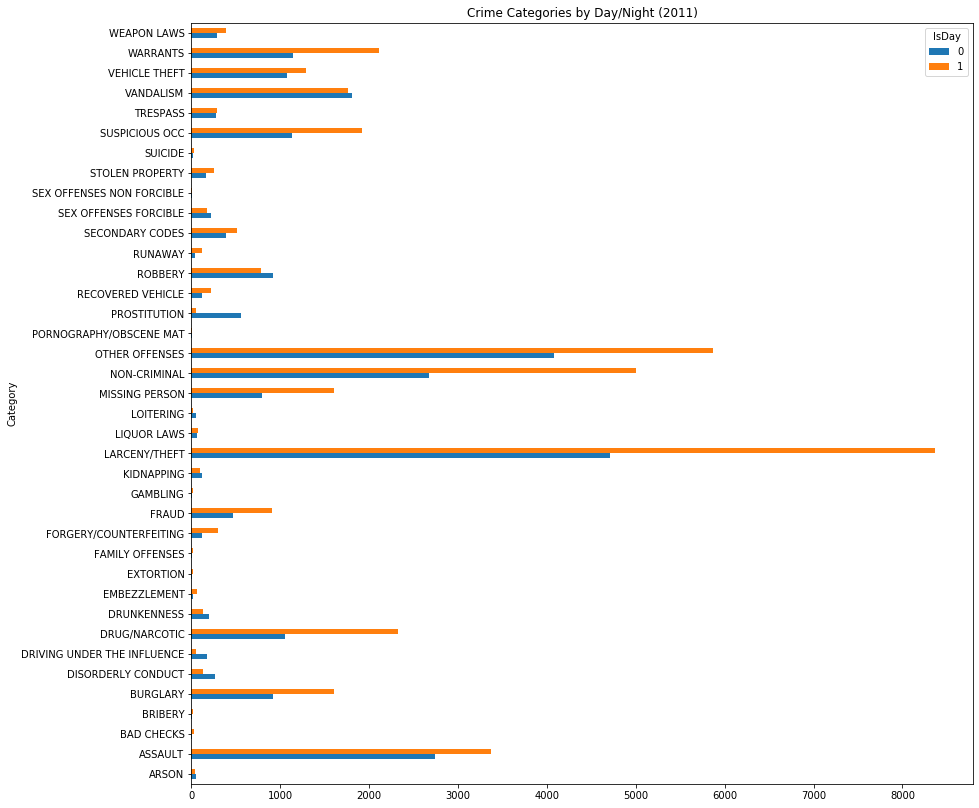

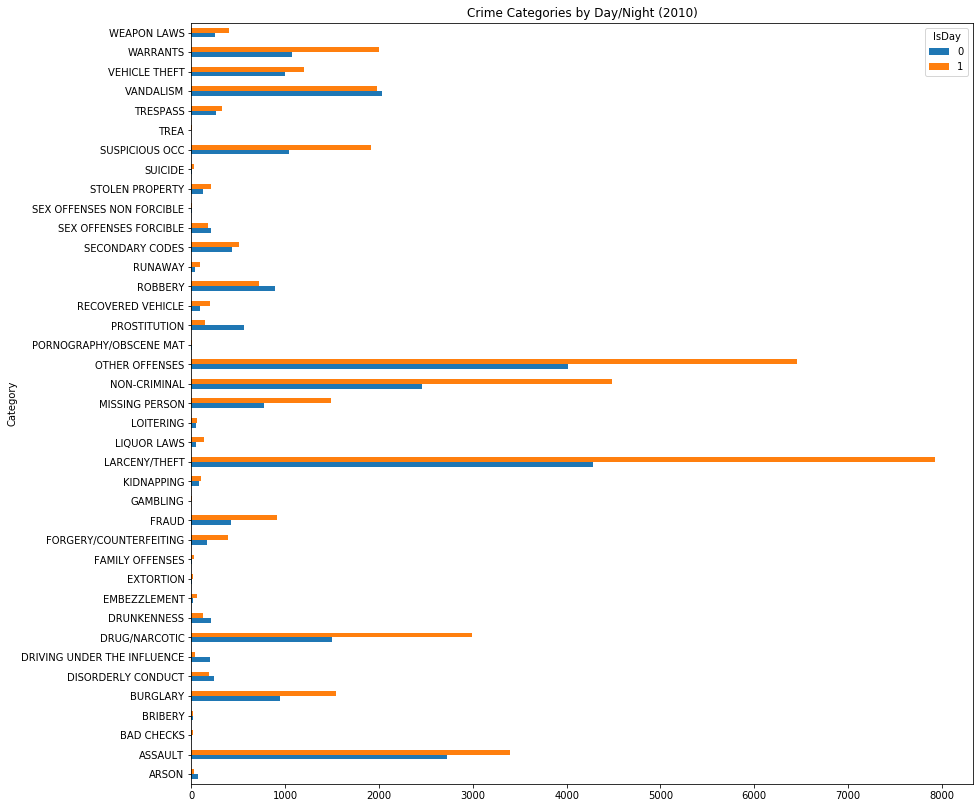

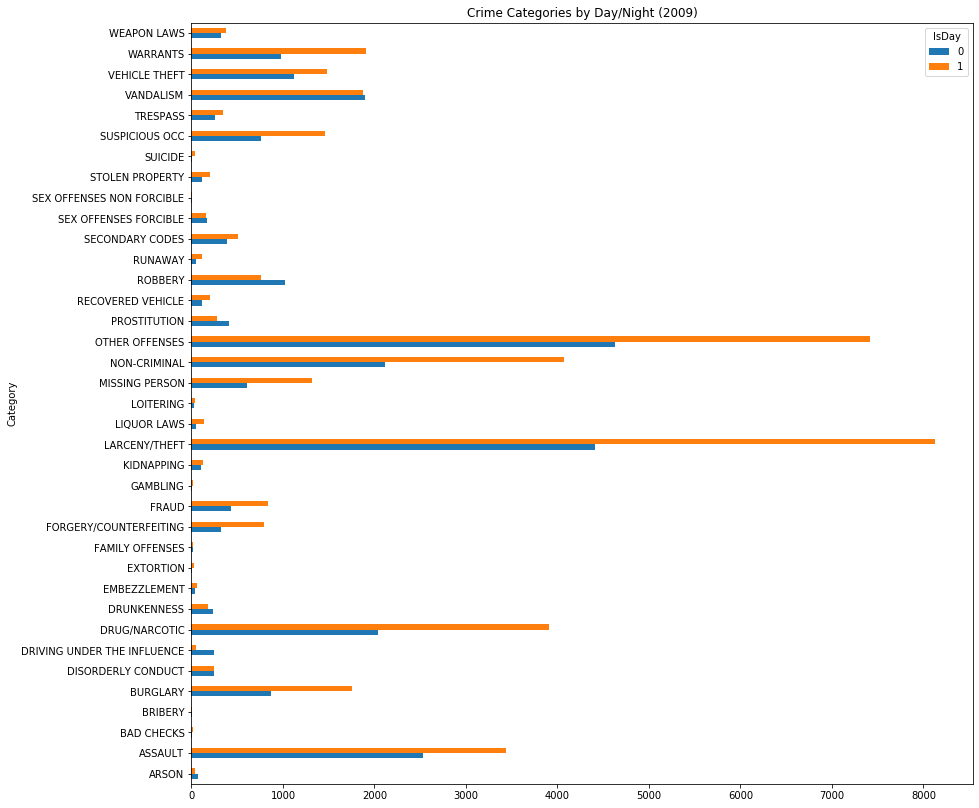

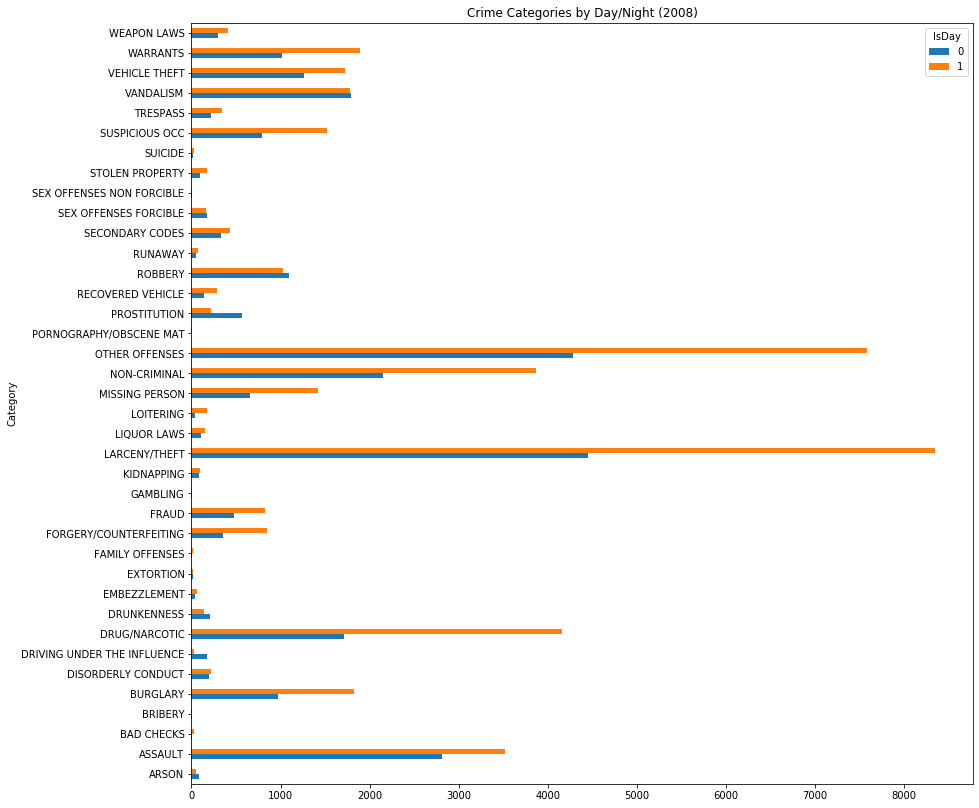

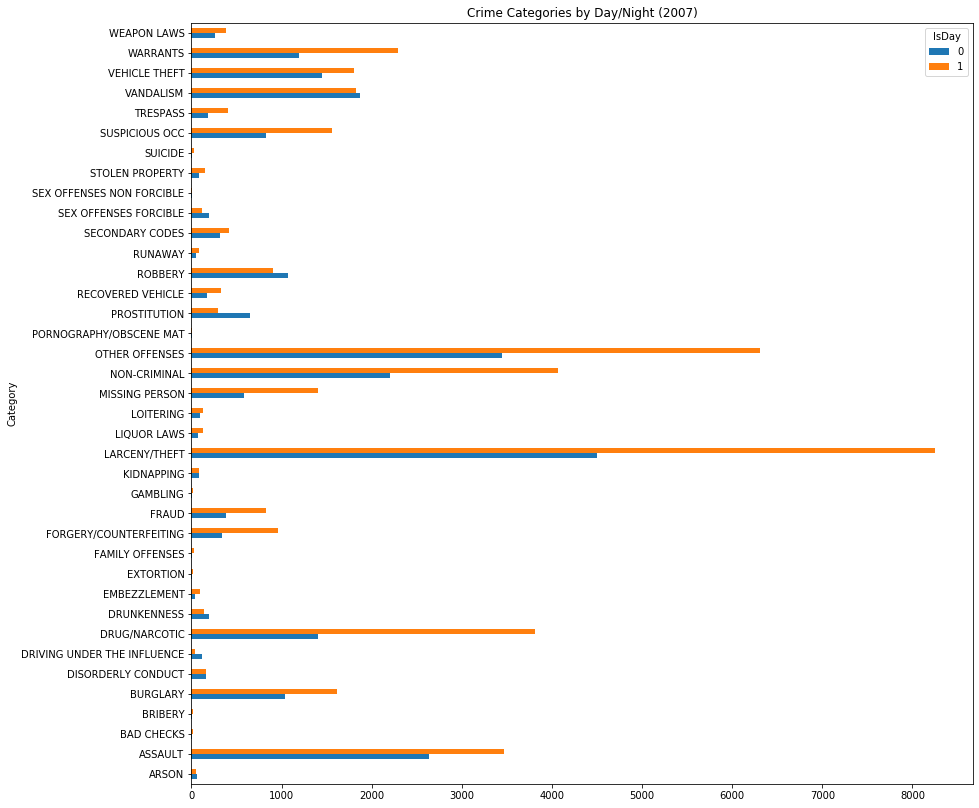

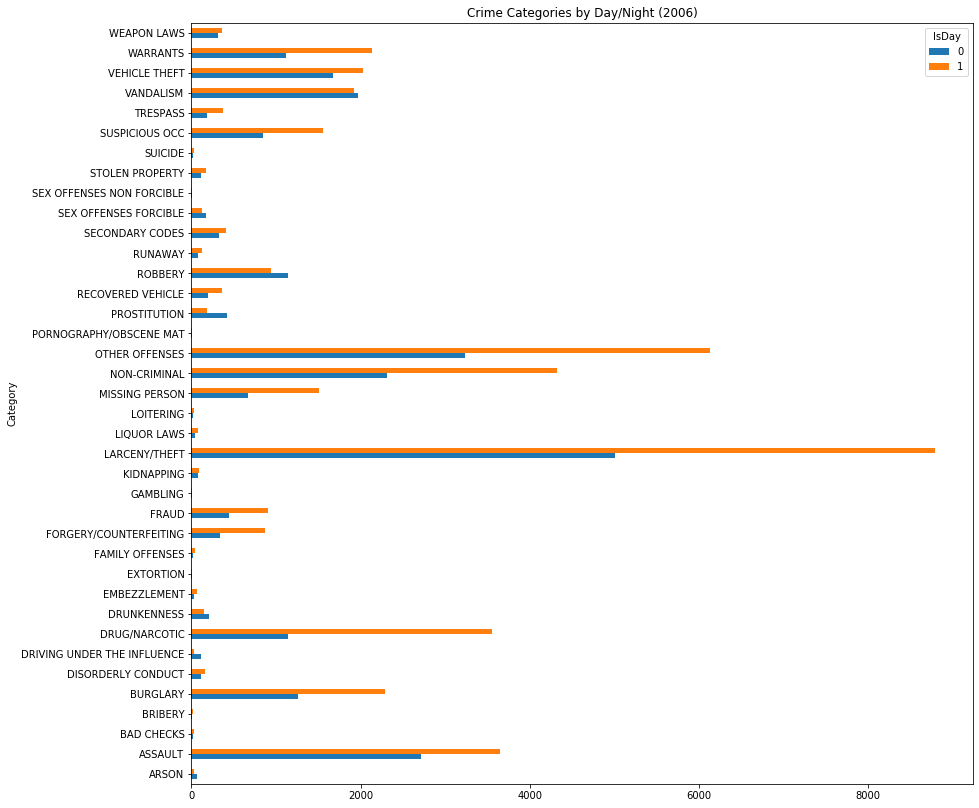

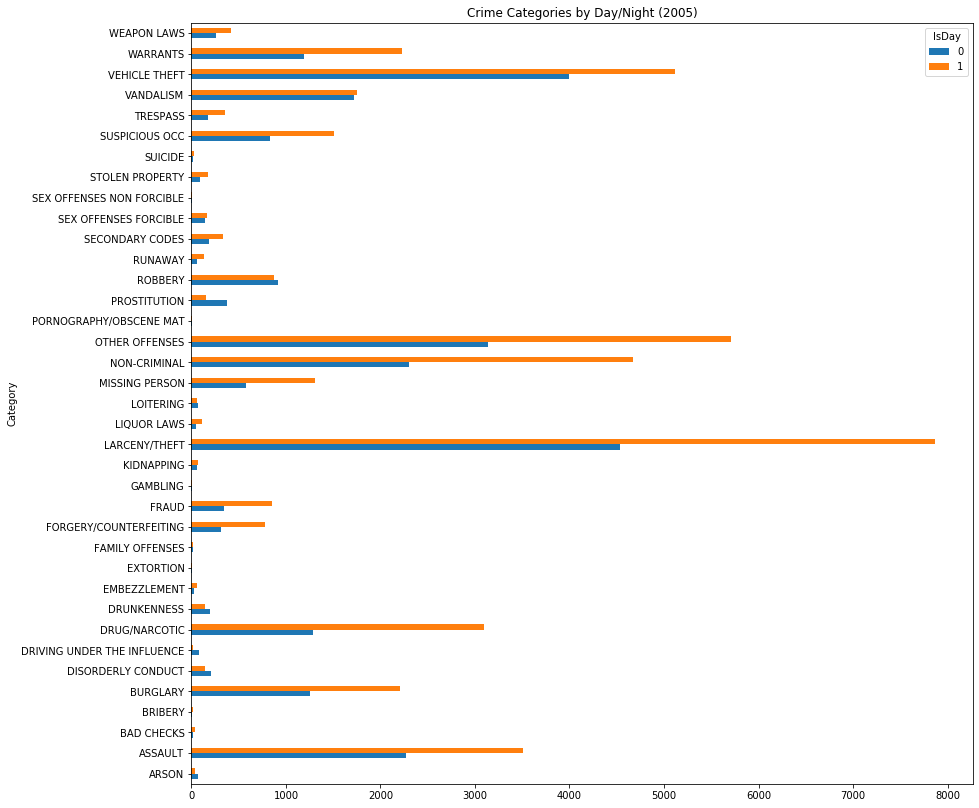

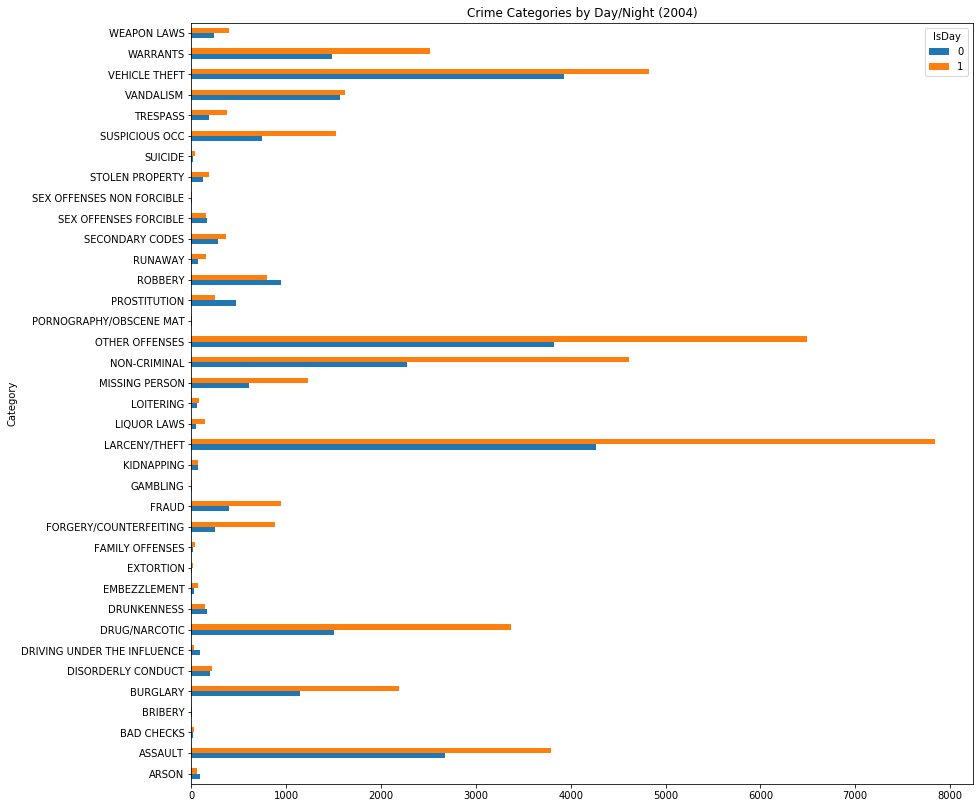

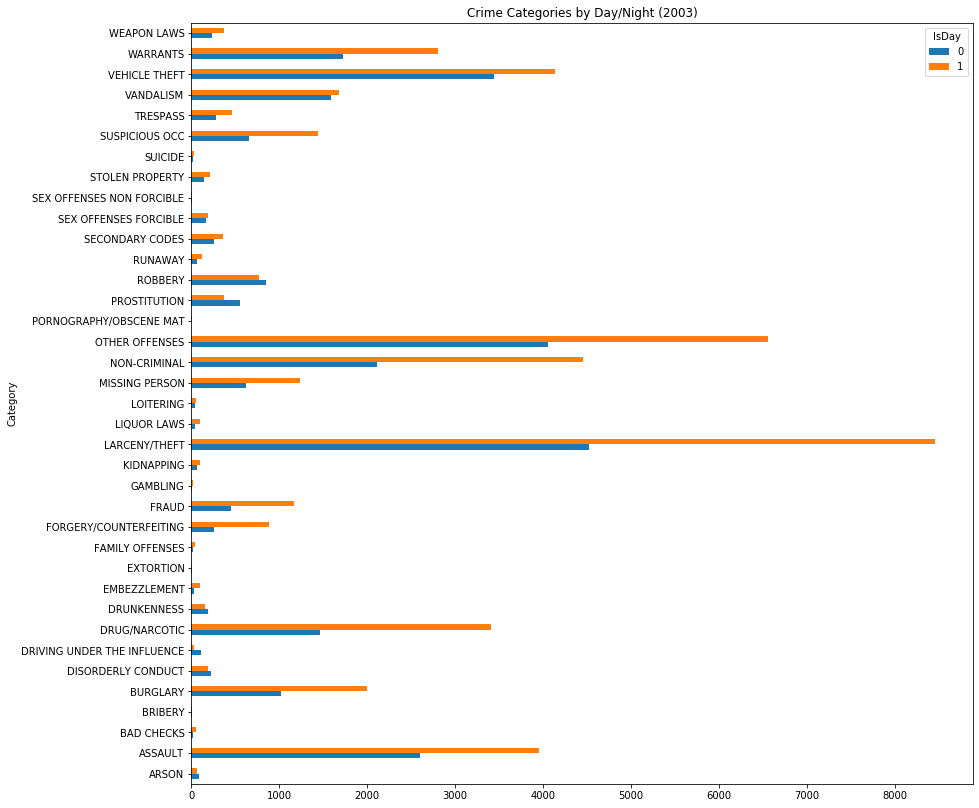

In [37]:
for y in all_years:
    ct = pd.crosstab(train_df1[train_df1.Year == y].Category, train_df1[train_df1.Year == y].IsDay)
    ct.plot(kind='barh', figsize=(14,14), title=f'Crime Categories by Day/Night ({y})')
    plt.show()

### Crime Categories by Timeslot

#### Now let's check the how crimes's categories change by time slot

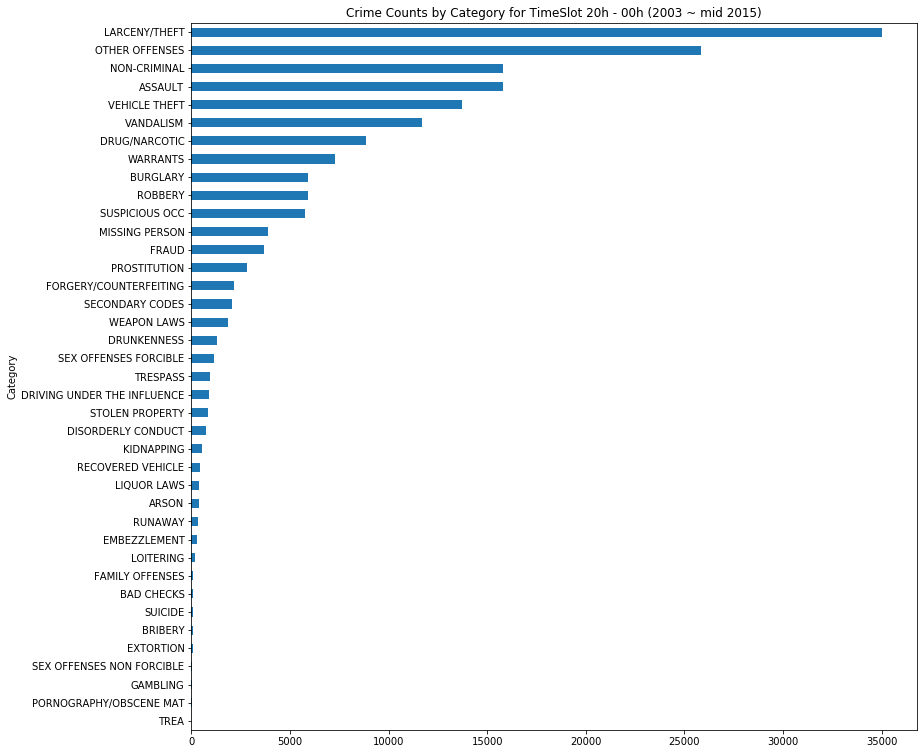

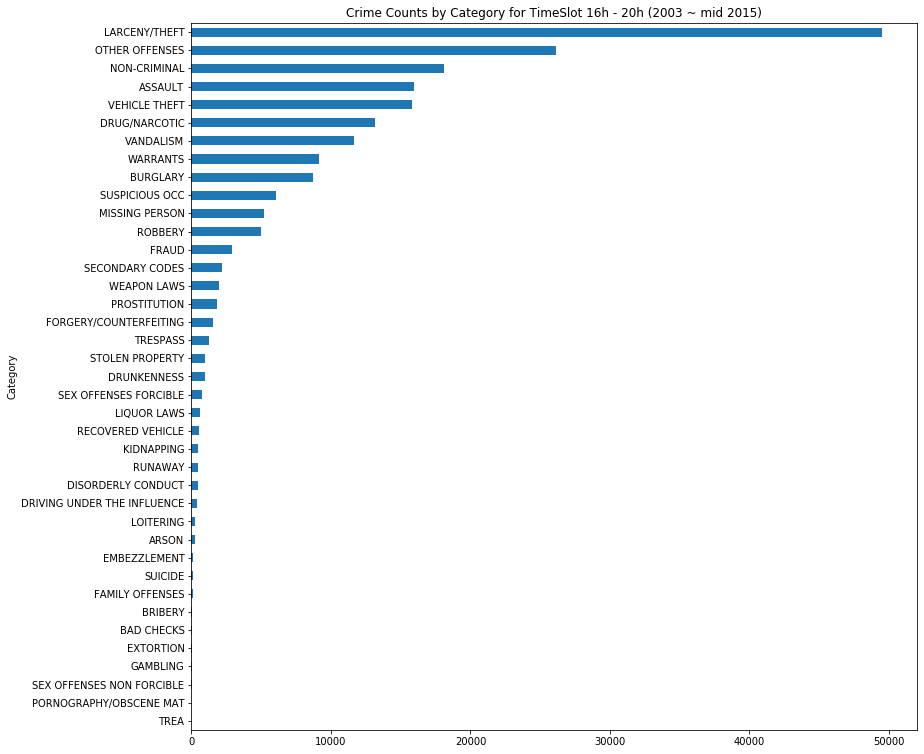

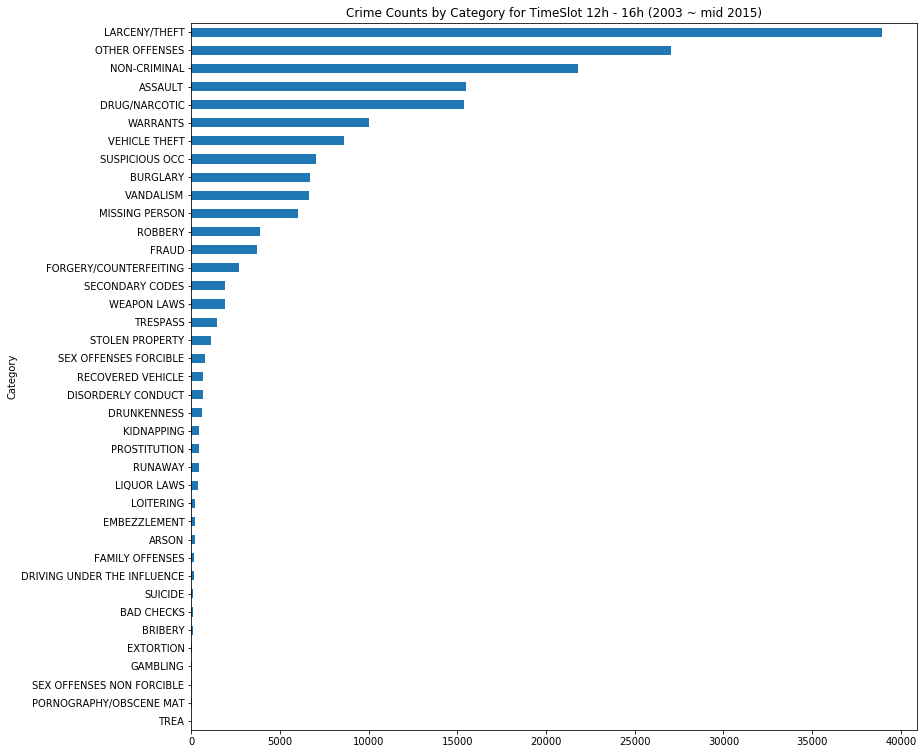

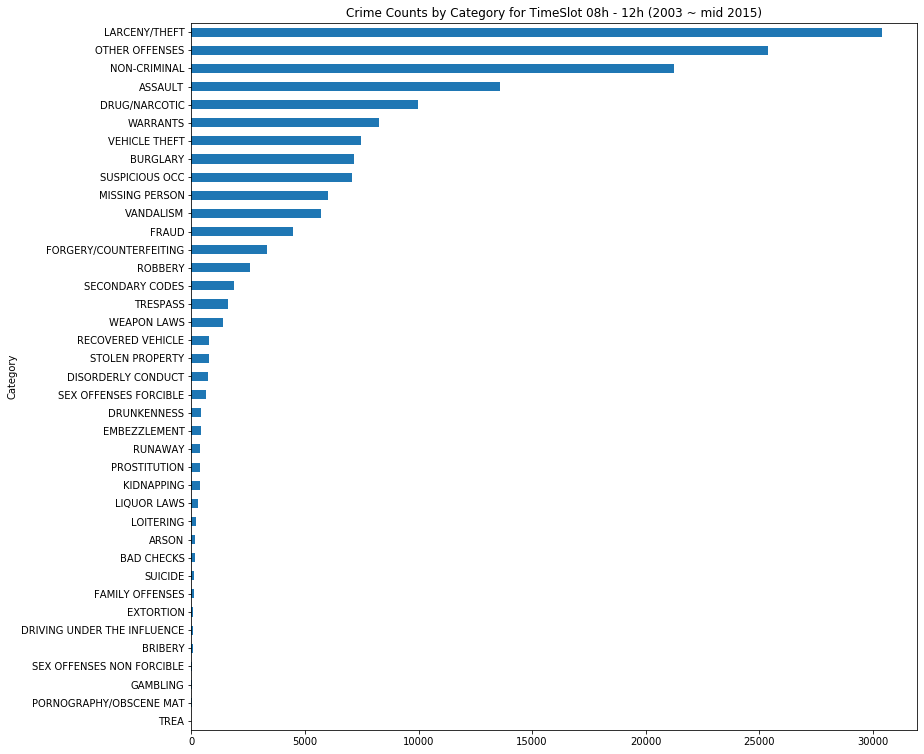

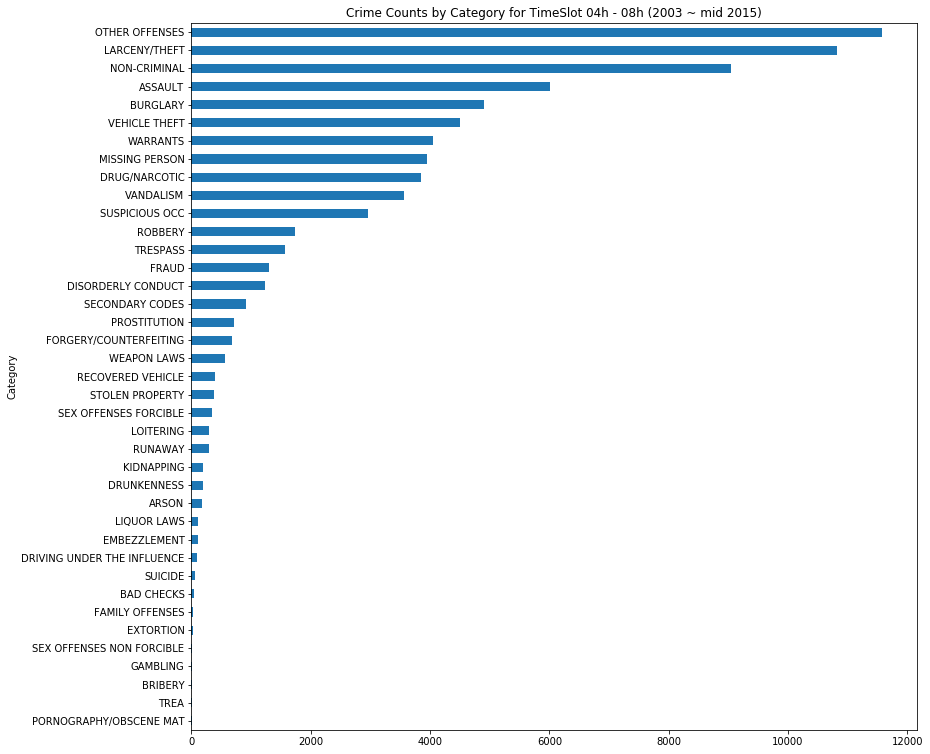

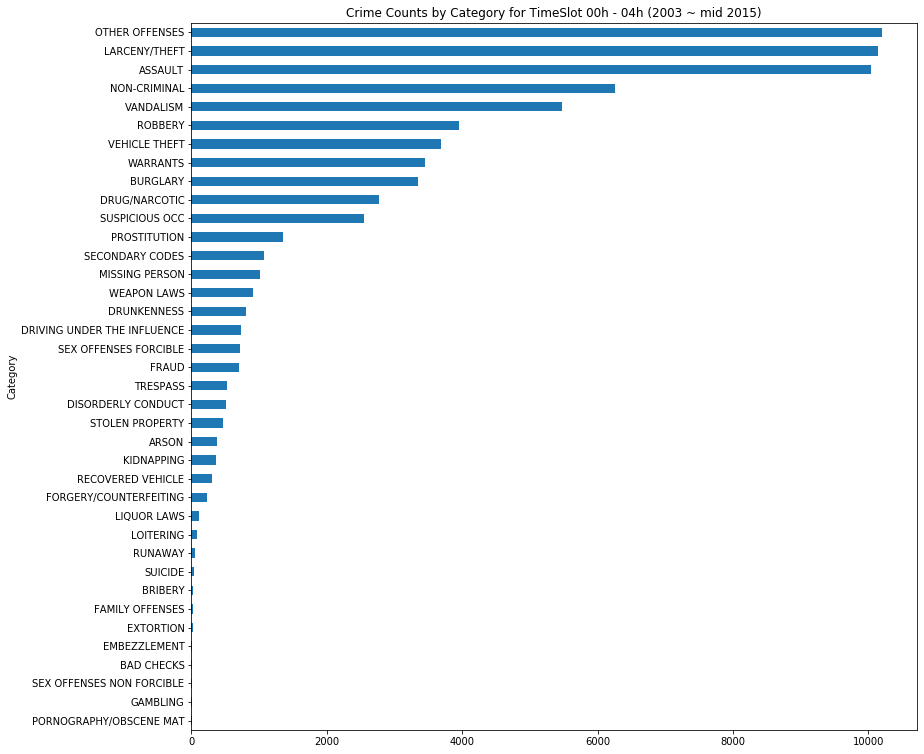

In [38]:
all_timeslots = train_df1.TimeSlot.unique()
for ts in all_timeslots:
    gb = train_df1[train_df1.TimeSlot == ts].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(13,13), title=f'Crime Counts by Category for TimeSlot {ts} (2003 ~ mid 2015)')
    plt.show()

#### We can focus on one particular category, for example Kidnapping/Robbery, and see when most of them occur

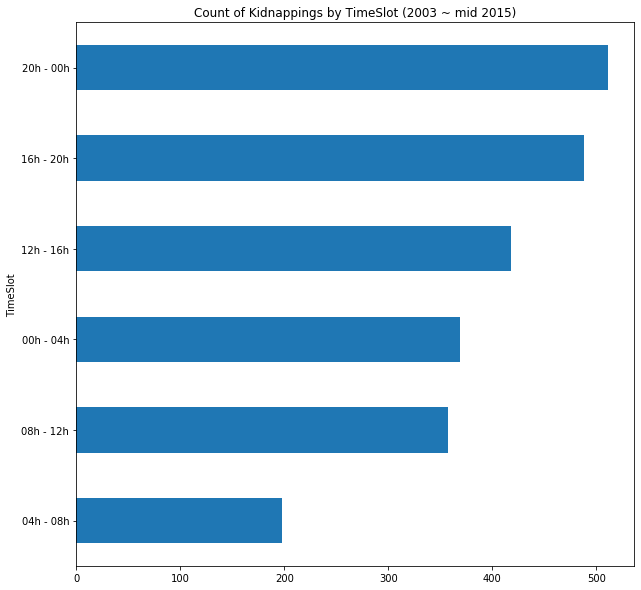

In [39]:
train_df1[train_df1.Category == 'KIDNAPPING'].groupby('TimeSlot')['Descript'].count().sort_values().plot(kind='barh', figsize=(10,10), title='Count of Kidnappings by TimeSlot (2003 ~ mid 2015)')

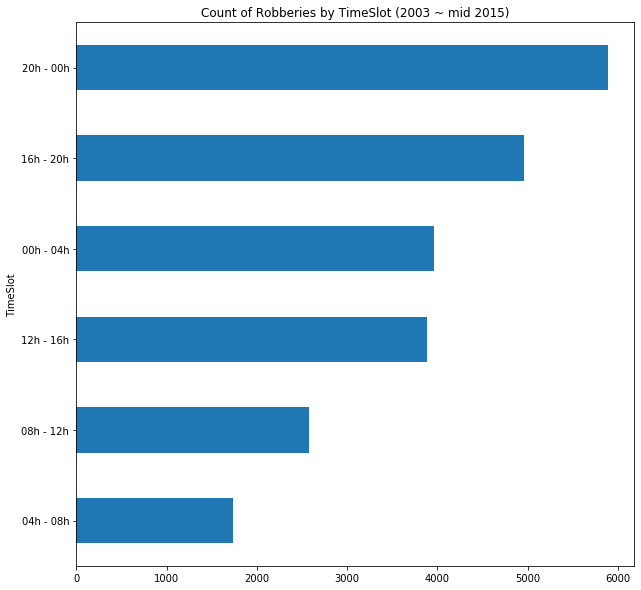

In [40]:
train_df1[train_df.Category == 'ROBBERY'].groupby('TimeSlot')['Descript'].count().sort_values().plot(kind='barh', figsize=(10,10), title='Count of Robberies by TimeSlot (2003 ~ mid 2015)')

#### We can see that most of the Kidnappings and Robberies occur between 16h ~ 00h

### Dummy Encoding of the Category Column

In [41]:
train_df1 = pd.get_dummies(train_df1, columns=['Category'])
train_df1.columns

Index(['DateTime', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution',
       'Address', 'X', 'Y', 'Year', 'Month', 'Hour', 'MonthSin', 'MonthCos',
       'DayOfWeekInt', 'DayOfWeekSin', 'DayOfWeekCos', 'HourSin', 'HourCos',
       'TimeSlot', 'IsDay', 'Category_ARSON', 'Category_ASSAULT',
       'Category_BAD CHECKS', 'Category_BRIBERY', 'Category_BURGLARY',
       'Category_DISORDERLY CONDUCT', 'Category_DRIVING UNDER THE INFLUENCE',
       'Category_DRUG/NARCOTIC', 'Category_DRUNKENNESS',
       'Category_EMBEZZLEMENT', 'Category_EXTORTION',
       'Category_FAMILY OFFENSES', 'Category_FORGERY/COUNTERFEITING',
       'Category_FRAUD', 'Category_GAMBLING', 'Category_KIDNAPPING',
       'Category_LARCENY/THEFT', 'Category_LIQUOR LAWS', 'Category_LOITERING',
       'Category_MISSING PERSON', 'Category_NON-CRIMINAL',
       'Category_OTHER OFFENSES', 'Category_PORNOGRAPHY/OBSCENE MAT',
       'Category_PROSTITUTION', 'Category_RECOVERED VEHICLE',
       'Category_ROBBERY', 'Category_RU

In [42]:
# Although I didn't do any feature engineering now, I'll output a new file because I might come back and to do it
train_df1.to_csv('data/train_clean_2.csv', index=False)
print('Done Outputing')

Done Outputing


In [80]:
train_df2 = pd.read_csv('data/train_clean_2.csv')
train_df2.sample(13)

DateTime                               Descript  DayOfWeek  \
368918  2010-03-25 09:45:00   MALICIOUS MISCHIEF, BREAKING WINDOWS   Thursday   
533752  2007-10-31 18:37:00  POSSESSION OF NARCOTICS PARAPHERNALIA  Wednesday   
751105  2004-09-14 16:40:00          SUSPICIOUS AUTO, POSSIBLY SEX    Tuesday   
684595  2005-08-27 23:30:00                                BATTERY   Saturday   
746812  2004-10-02 10:42:00  DRIVERS LICENSE, SUSPENDED OR REVOKED   Saturday   
7091    2015-04-05 06:53:00              POSS OF PROHIBITED WEAPON     Sunday   
402200  2009-09-17 14:15:00                           STOLEN TRUCK   Thursday   
408076  2009-08-20 20:30:00           GRAND THEFT FROM LOCKED AUTO   Thursday   
548422  2007-08-20 11:45:00           AIDED CASE, MENTAL DISTURBED     Monday   
402119  2009-09-17 17:09:00                         WARRANT ARREST   Thursday   
319138  2010-12-16 23:47:00   ENROUTE TO DEPARTMENT OF CORRECTIONS   Thursday   
673103  2005-10-23 18:45:00              RECEIVING STOLEN PROPERTY     Sunday   
99862   2014-01-12 02:00:00                PETTY THEFT OF PROPERTY     Sunday   

        PdDistrict                              Resolution  \
368918     BAYVIEW  DISTRICT ATTORNEY REFUSES TO PROSECUTE   
533752  TENDERLOIN                          ARREST, BOOKED   
751105     CENTRAL                                    NONE   
684595     MISSION                                    NONE   
746812     BAYVIEW                           ARREST, CITED   
7091       BAYVIEW                          ARREST, BOOKED   
402200     MISSION                                    NONE   
408076  TENDERLOIN                                    NONE   
548422    SOUTHERN                                    NONE   
402119    SOUTHERN                          ARREST, BOOKED   
319138    SOUTHERN                          ARREST, BOOKED   
673103     CENTRAL                          ARREST, BOOKED   
99862         PARK                                    NONE   

                              Address           X          Y  Year  Month  \
368918    900 Block of CONNECTICUT ST -122.397202  37.753535  2010      3   
533752            TURK ST / TAYLOR ST -122.410769  37.783215  2007     10   
751105        MONTGOMERY ST / CLAY ST -122.403143  37.794666  2004      9   
684595   MISSION ST / CESAR CHAVEZ ST -122.418222  37.748166  2005      8   
746812  1100 Block of PENNSYLVANIA AV -122.392678  37.752239  2004     10   
7091             2800 Block of 3RD ST -122.387954  37.753454  2015      4   
402200          3800 Block of 25TH ST -122.426155  37.750109  2009      9   
408076           LARKIN ST / GROVE ST -122.416583  37.778659  2009      8   
548422         900 Block of HOWARD ST -122.406508  37.780331  2007      8   
402119             MARKET ST / 4TH ST -122.405832  37.785745  2009      9   
319138     GOLDEN GATE AV / TAYLOR ST -122.410294  37.782231  2010     12   
673103           300 Block of POST ST -122.407613  37.788449  2005     10   
99862           MARKET ST / CASTRO ST -122.435188  37.762670  2014      1   

        ...  Category_SEX OFFENSES NON FORCIBLE  Category_STOLEN PROPERTY  \
368918  ...                                   0                         0   
533752  ...                                   0                         0   
751105  ...                                   0                         0   
684595  ...                                   0                         0   
746812  ...                                   0                         0   
7091    ...                                   0                         0   
402200  ...                                   0                         0   
408076  ...                                   0                         0   
548422  ...                                   0                         0   
402119  ...                                   0                         0   
319138  ...                                   0                         0   
673103  ... 

## The PdDistrict Column

#### Let's list all the PdDistricts:

In [49]:
import folium
from folium.plugins import HeatMap
all_districts = train_df2.PdDistrict.unique()
all_districts, len(all_districts)

(array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
        'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object),
 10)

#### We have 10 PdDistricts

### PdDistricts Map Visualization

#### To get the boundaries & coordinates of each PdDistrict, I refered to:
    - the GeoJson file from this link: https://data.sfgov.org/Public-Safety/Current-Police-Districts/wkhw-cjsf
    - this Image : https://s.hdnux.com/photos/46/44/02/10109103/27/940x940.jpg
    
**Notice**: I didn't find a way to permanently show the names of the PdDistricts in the Folium Map, so I just made normal Folium Markers with tooltips showing the name of the PdDistrict when the mouse hovers over them

In [64]:
districts_coordinates = {}
districts_coordinates['MISSION'] = [37.755, -122.42]
districts_coordinates['NORTHERN'] = [37.787, -122.433]
districts_coordinates['PARK'] = [37.76, -122.45]
districts_coordinates['INGLESIDE'] = [37.727, -122.435]
districts_coordinates['RICHMOND'] = [37.775, -122.48]
districts_coordinates['CENTRAL'] = [37.795, -122.41]
districts_coordinates['TARAVAL'] = [37.736, -122.48]
districts_coordinates['TENDERLOIN'] = [37.78, -122.414]
districts_coordinates['SOUTHERN'] = [37.772, -122.4]
districts_coordinates['BAYVIEW'] = [37.732, -122.39]

In [81]:
city_coordinates=[37.77397, -122.4312]
m = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
#folium.Marker([37.732, -122.39], tooltip='MISSION').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
m

#### Next, Let's list the PdDistricts where most crimes occur

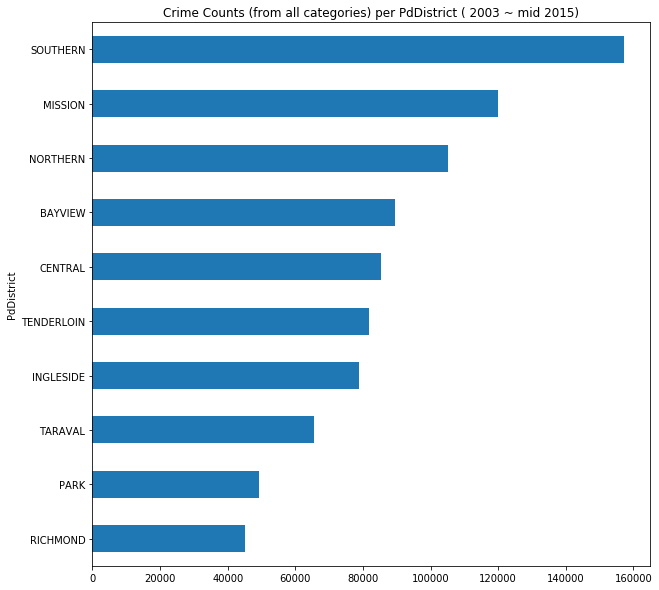

In [66]:
gb = train_df2.groupby('PdDistrict')['Descript'].count().sort_values()
gb.plot(kind='barh', figsize=(10,10), title='Crime Counts (from all categories) per PdDistrict ( 2003 ~ mid 2015)')

In [67]:
train_df2

DateTime                                   Descript  \
0       2015-05-13 23:53:00                             WARRANT ARREST   
1       2015-05-13 23:53:00                   TRAFFIC VIOLATION ARREST   
2       2015-05-13 23:33:00                   TRAFFIC VIOLATION ARREST   
3       2015-05-13 23:30:00               GRAND THEFT FROM LOCKED AUTO   
4       2015-05-13 23:30:00               GRAND THEFT FROM LOCKED AUTO   
...                     ...                                        ...   
878044  2003-01-06 00:15:00           ROBBERY ON THE STREET WITH A GUN   
878045  2003-01-06 00:01:00               GRAND THEFT FROM LOCKED AUTO   
878046  2003-01-06 00:01:00               GRAND THEFT FROM LOCKED AUTO   
878047  2003-01-06 00:01:00  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES   
878048  2003-01-06 00:01:00                   CHECKS, FORGERY (FELONY)   

        DayOfWeek PdDistrict      Resolution                     Address  \
0       Wednesday   NORTHERN  ARREST, BOOKED          OAK ST / LAGUNA ST   
1       Wednesday   NORTHERN  ARREST, BOOKED          OAK ST / LAGUNA ST   
2       Wednesday   NORTHERN  ARREST, BOOKED   VANNESS AV / GREENWICH ST   
3       Wednesday   NORTHERN            NONE    1500 Block of LOMBARD ST   
4       Wednesday       PARK            NONE   100 Block of BRODERICK ST   
...           ...        ...             ...                         ...   
878044     Monday    TARAVAL            NONE  FARALLONES ST / CAPITOL AV   
878045     Monday  INGLESIDE            NONE        600 Block of EDNA ST   
878046     Monday   SOUTHERN            NONE          5TH ST / FOLSOM ST   
878047     Monday   SOUTHERN            NONE        TOWNSEND ST / 2ND ST   
878048     Monday    BAYVIEW            NONE    1800 Block of NEWCOMB AV   

                 X          Y  Year  Month  ...  \
0      -122.425892  37.774599  2015      5  ...   
1      -122.425892  37.774599  2015      5  ...   
2      -122.424363  37.800414  2015      5  ...   
3      -122.426995  37.800873  2015      5  ...   
4      -122.438738  37.771541  2015      5  ...   
...            ...        ...   ...    ...  ...   
878044 -122.459033  37.714056  2003      1  ...   
878045 -122.447364  37.731948  2003      1  ...   
878046 -122.403390  37.780266  2003      1  ...   
878047 -122.390531  37.780607  2003      1  ...   
878048 -122.394926  37.738212  2003      1  ...   

        Category_SEX OFFENSES NON FORCIBLE  Category_STOLEN PROPERTY  \
0                                        0                         0   
1                                        0                         0   
2                                        0                         0   
3                                        0                         0   
4                                        0                         0   
...                                    ...                       ...   
878044                                   0                         0   
878045                                   0                         0   
878046                                   0                         0   
878047                                   0                         0   
878048                                   0                         0   

        Category_SUICIDE  Category_SUSPICIOUS OCC  Category_TREA  \
0                      0                        0              0   
1                      0                        0              0   
2                      0                        0              0   
3                      0                        0              0   
4                      0                        0              0   
...                  ...                      ...            ...   
878044                 0                        0              0   
878045                 0                        0              0   
878046                 0                        0              0   
878047                 0                        0          

#### Let's now list the crime counts per category for each district in the last year 2014( to see what types of crimes occur most in each district)

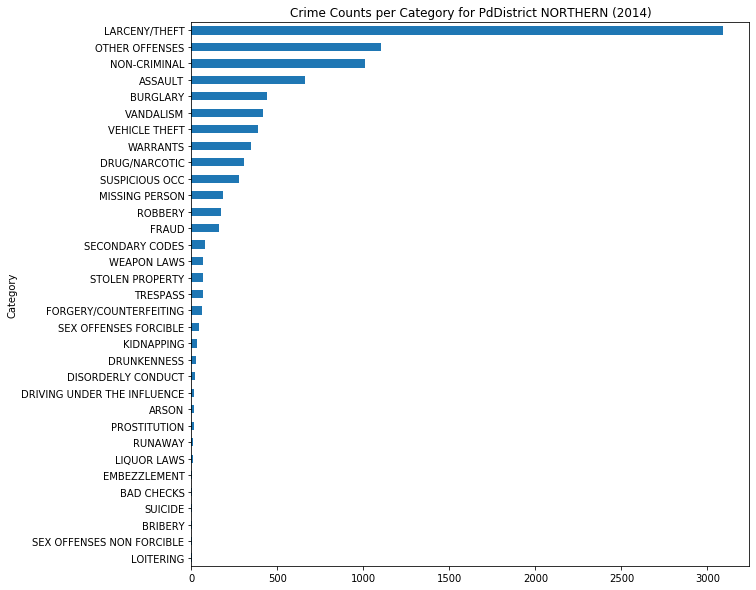

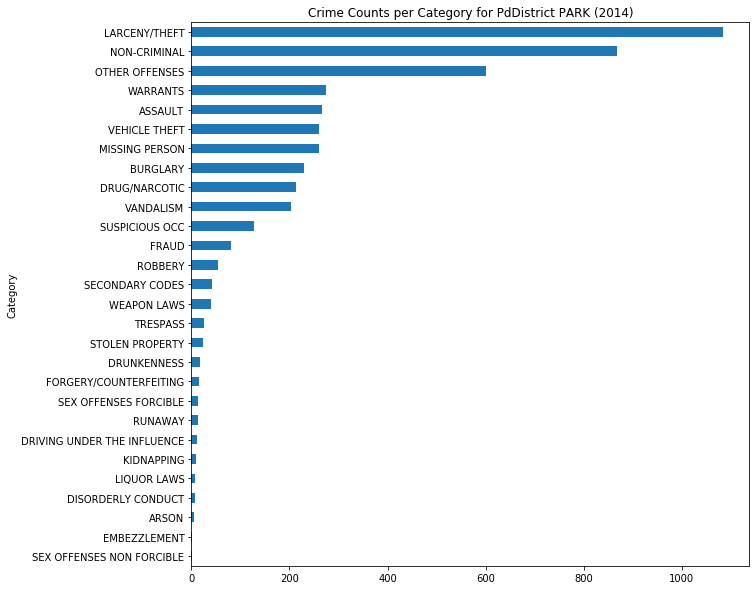

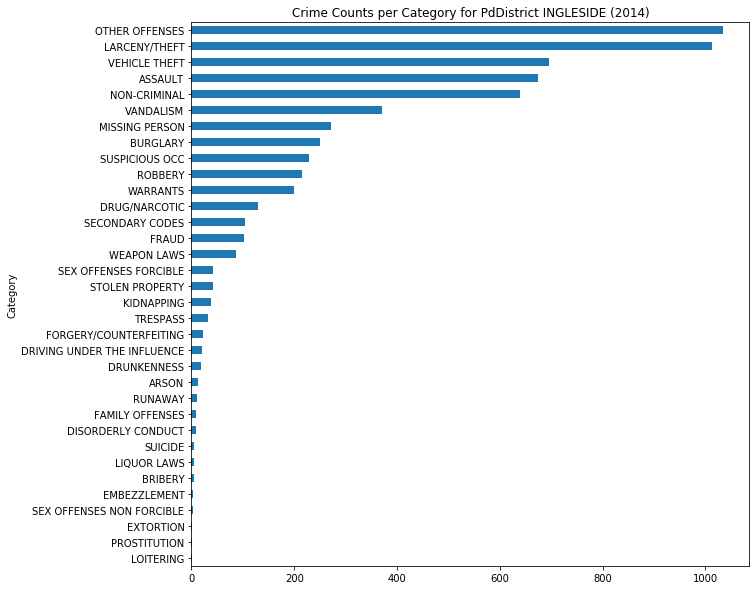

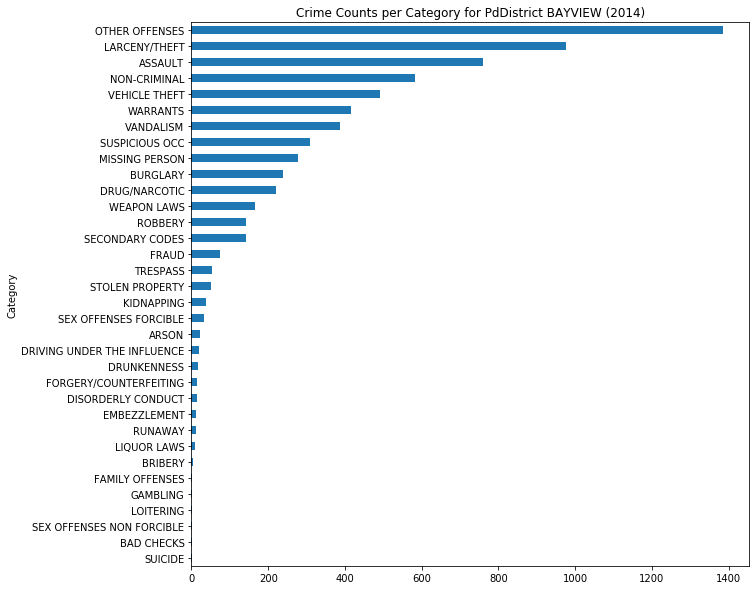

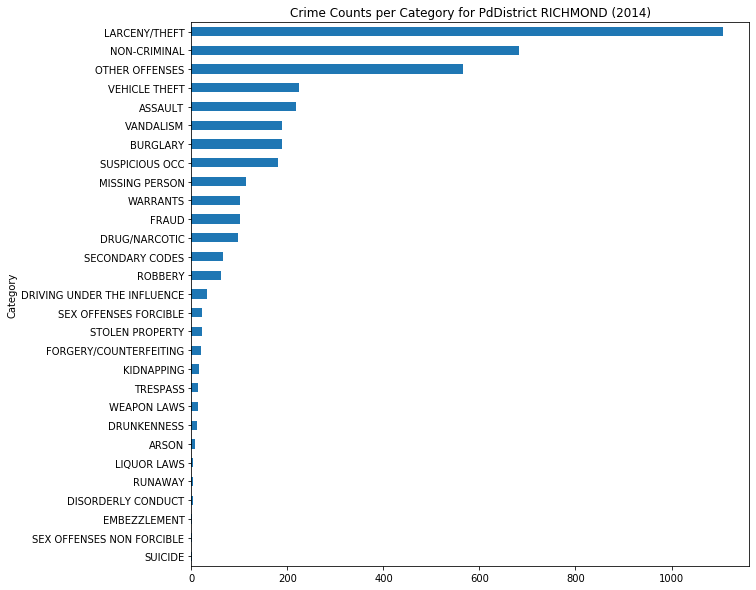

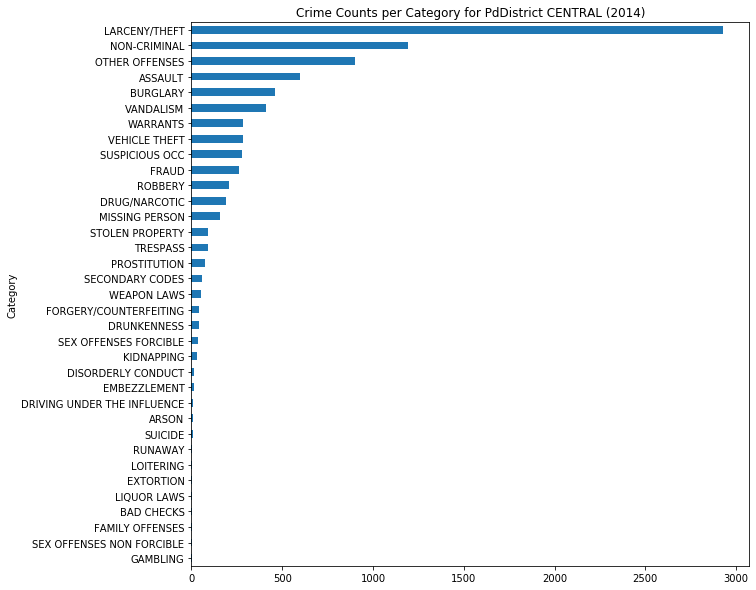

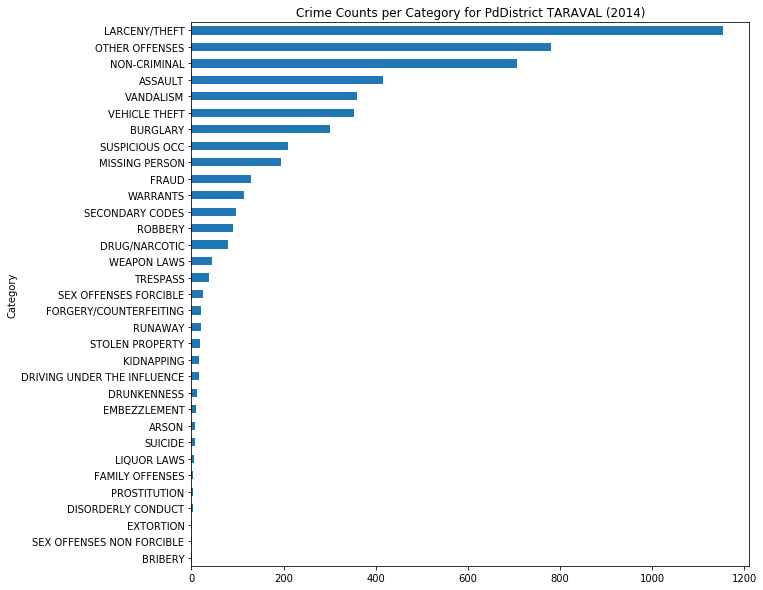

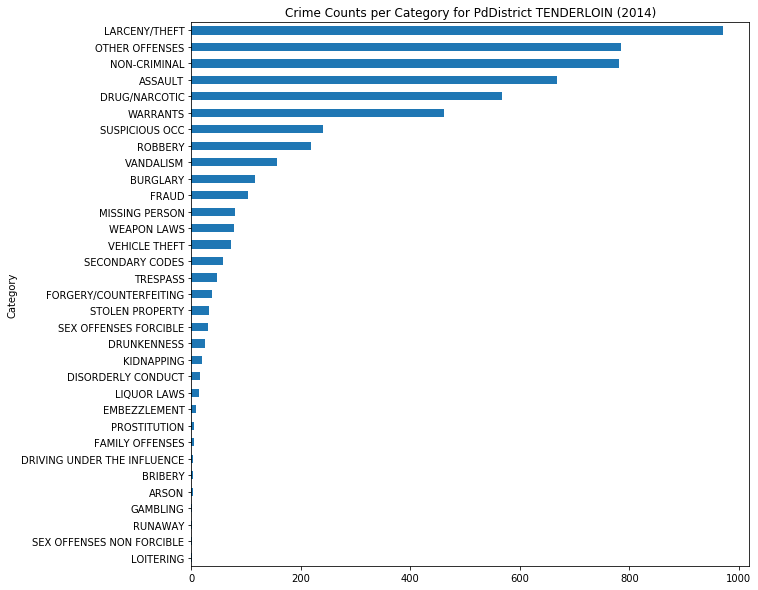

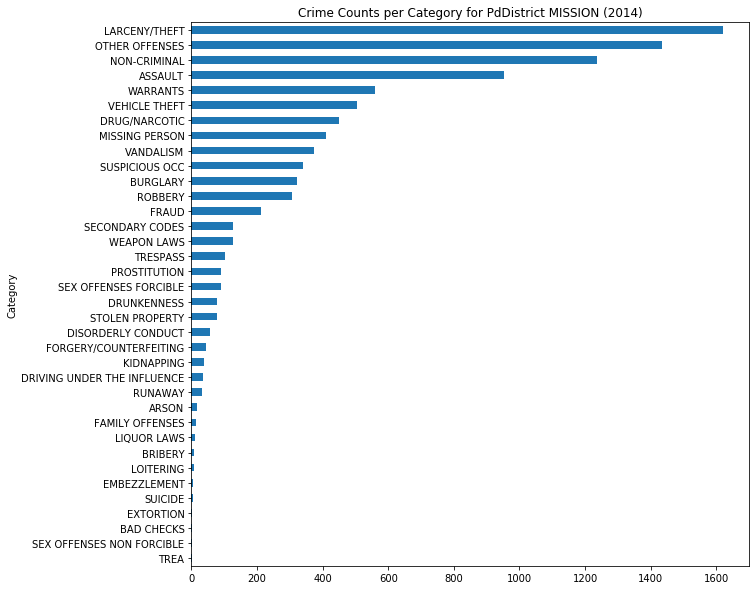

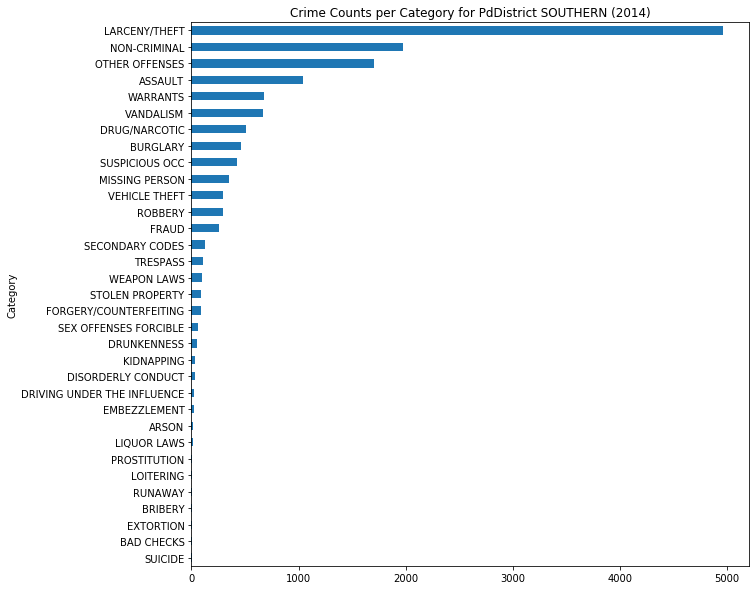

In [68]:
y = 2014
for pd in all_districts:
    gb = train_df[ (train_df.Year == y) & (train_df.PdDistrict == pd) ].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(10,10), title=f'Crime Counts per Category for PdDistrict {pd} ({y})')
    plt.show()

#### It is clear that crimes from category 'LARCENY/THEFT' are always on the Top Two in all PdDistricts

#### Another way to better visualize it, is to plot the crime counts of each category per PdDistrict

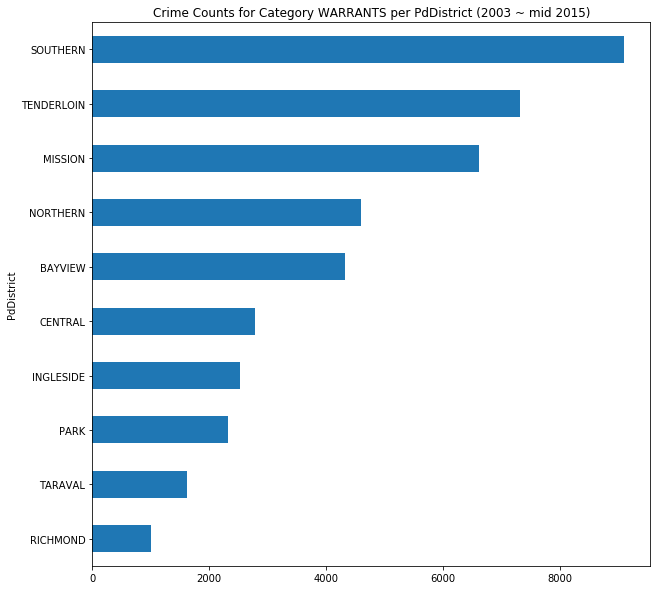

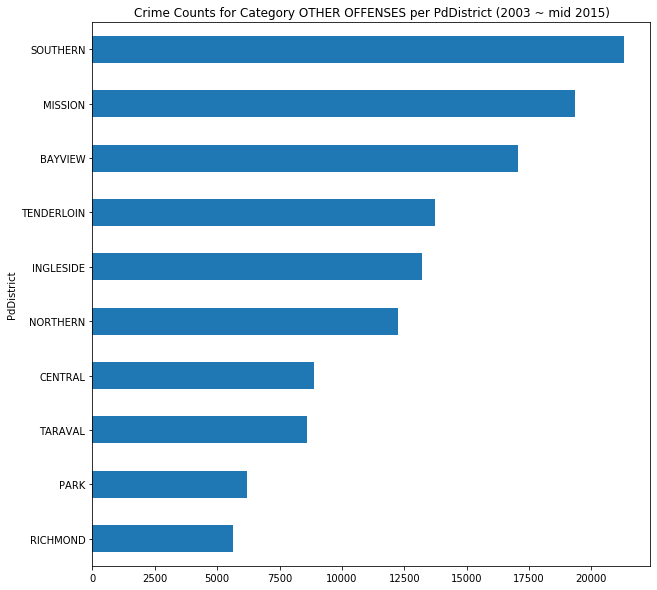

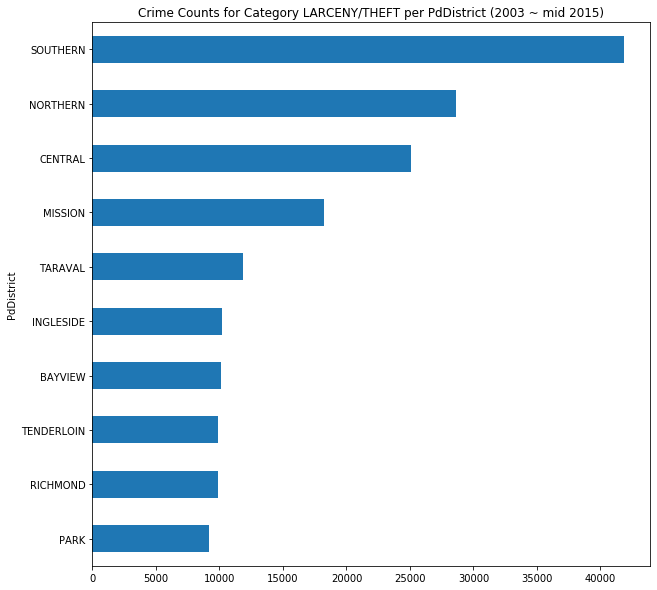

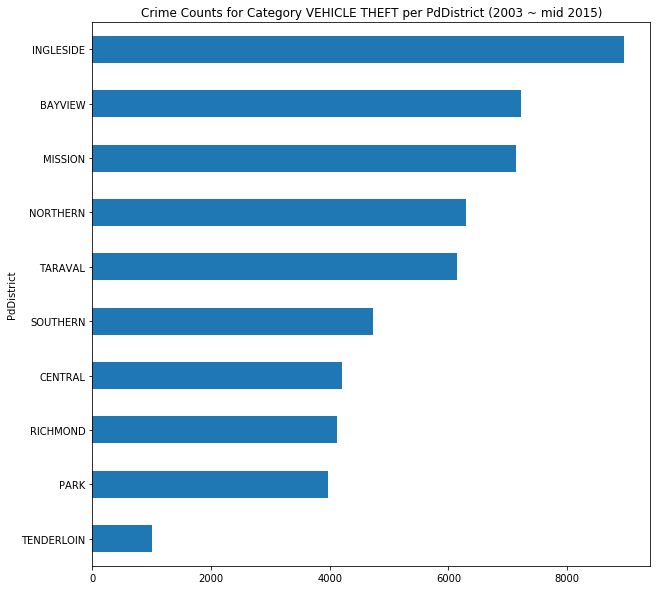

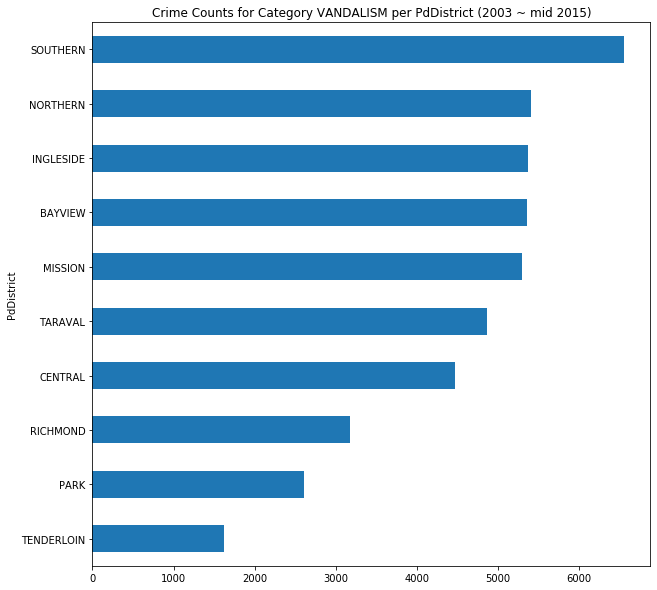

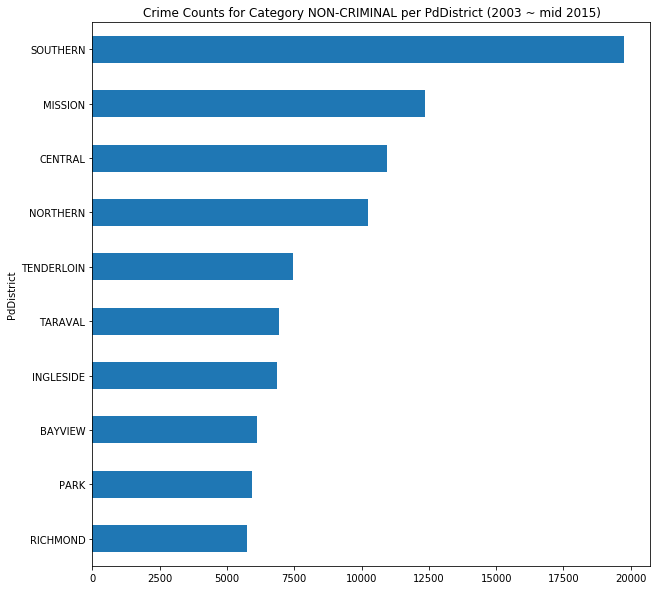

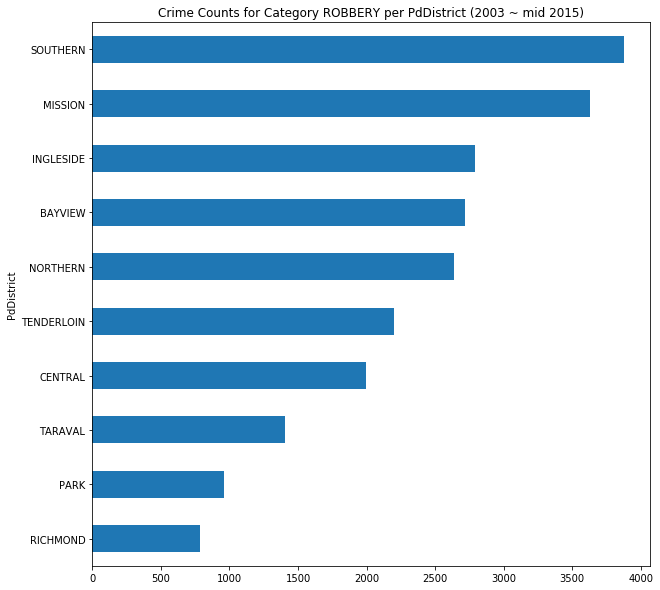

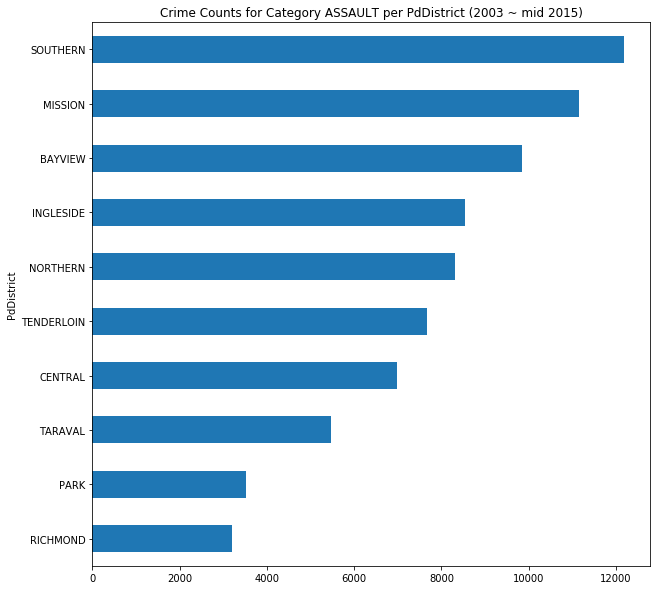

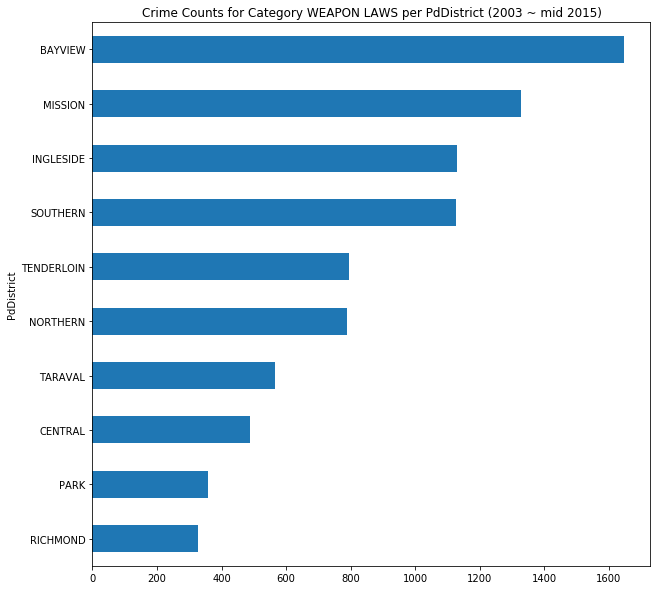

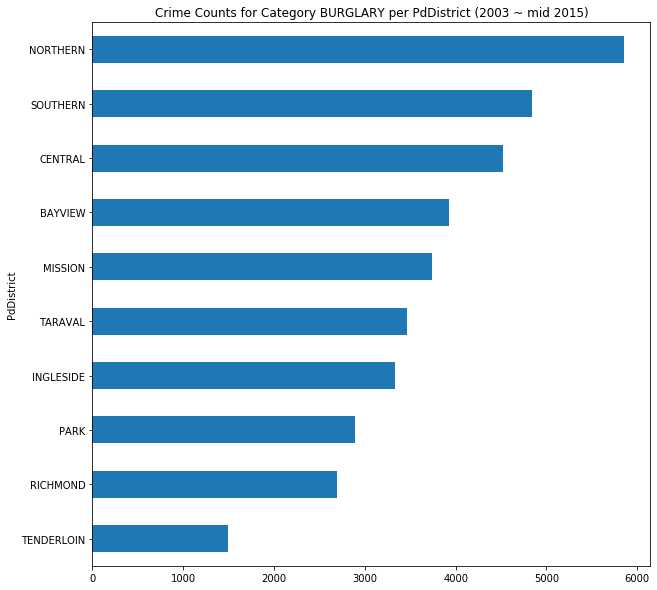

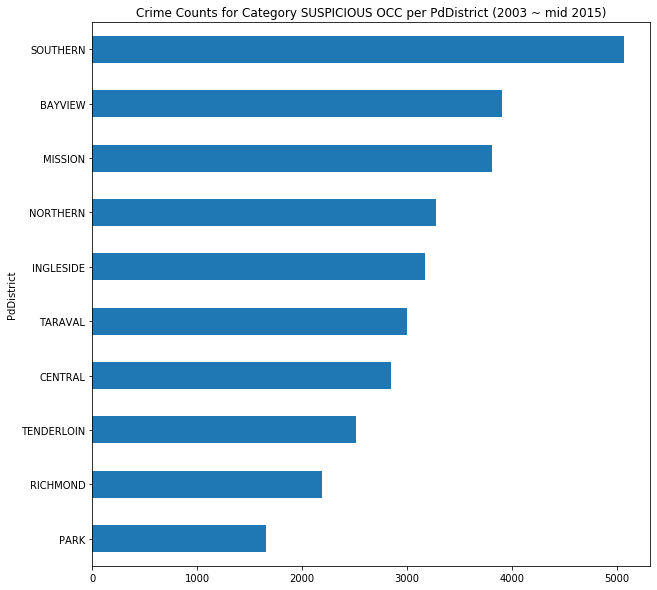

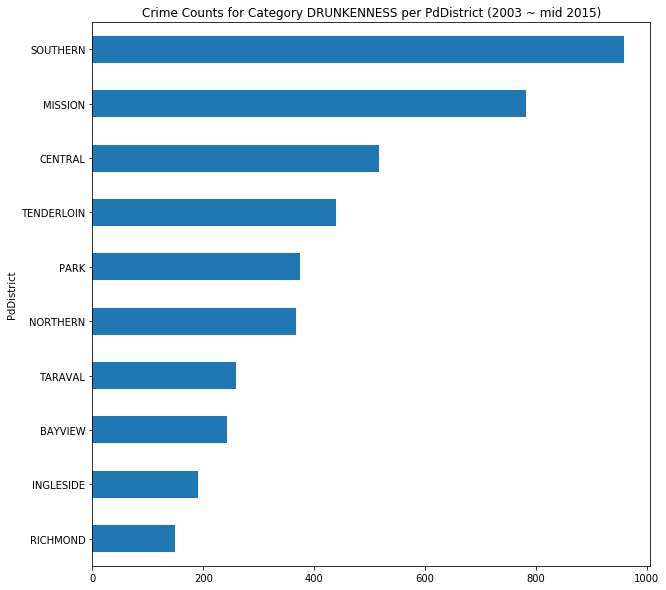

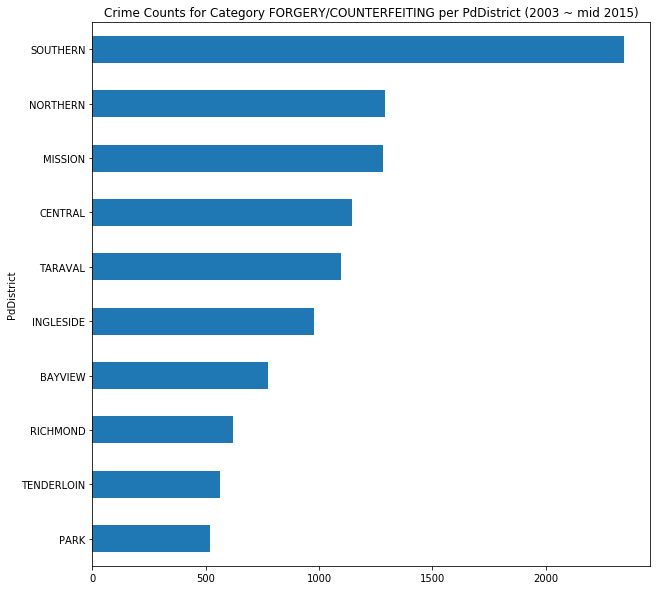

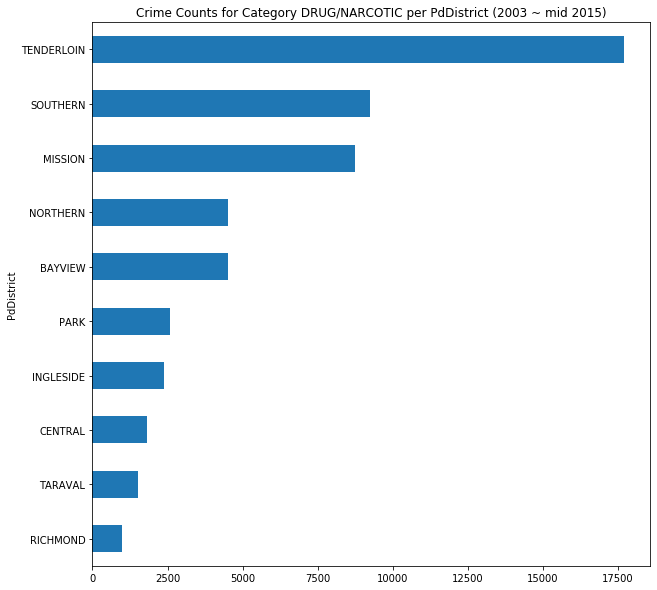

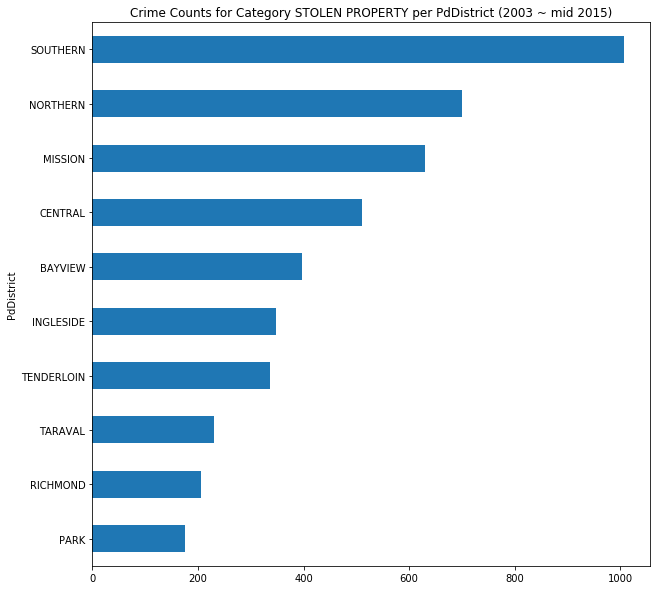

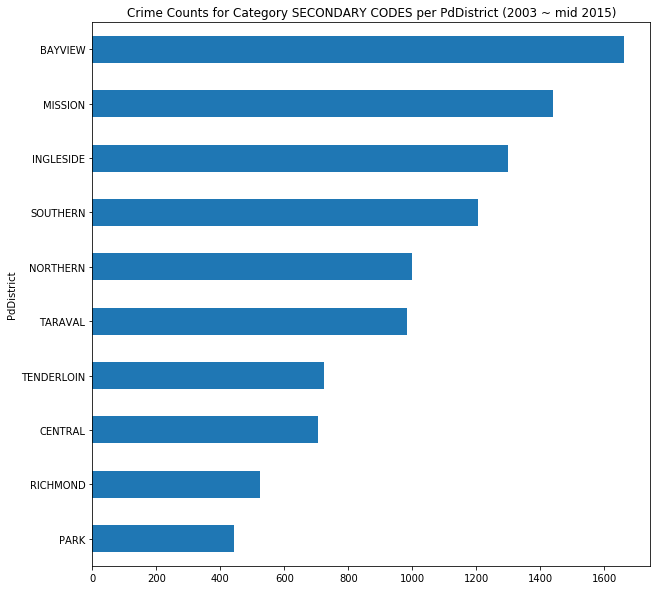

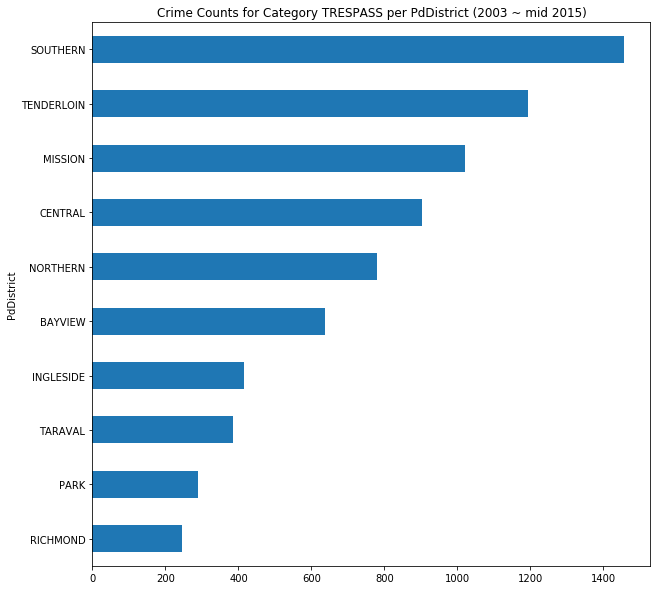

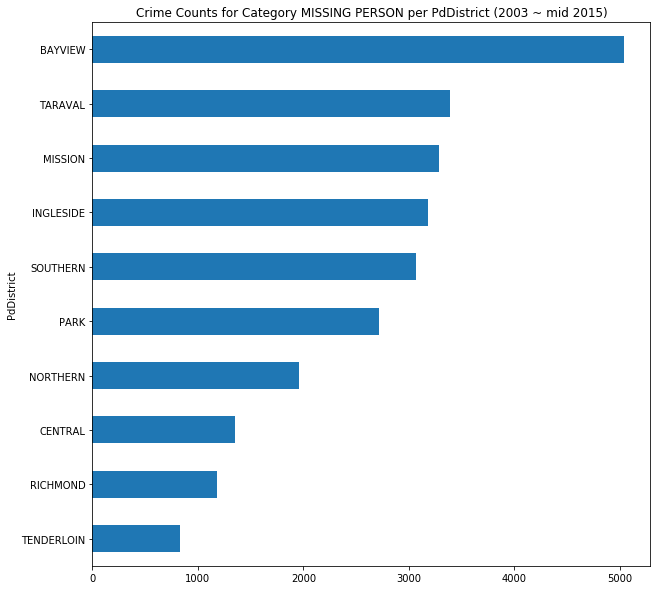

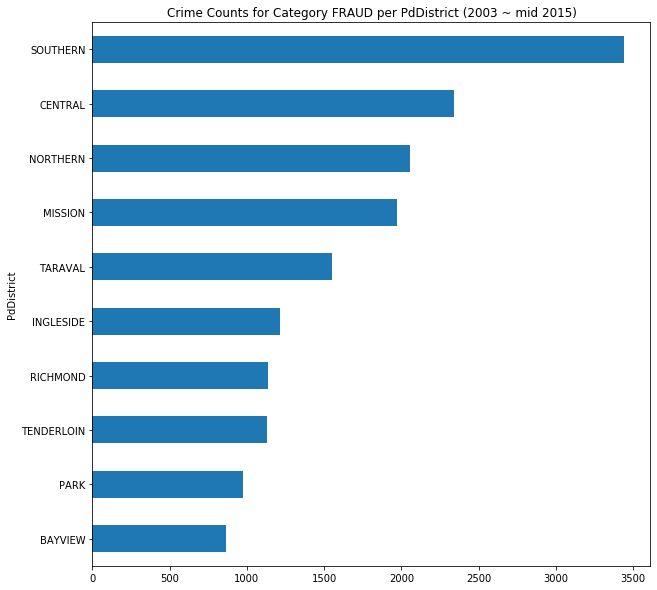

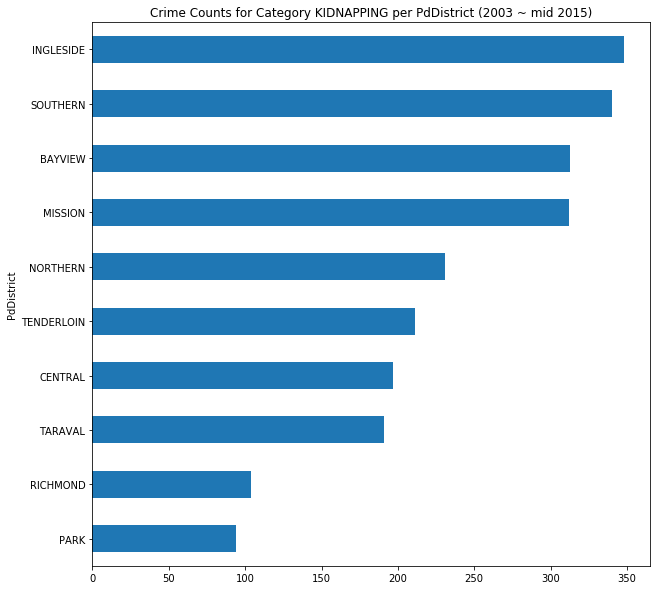

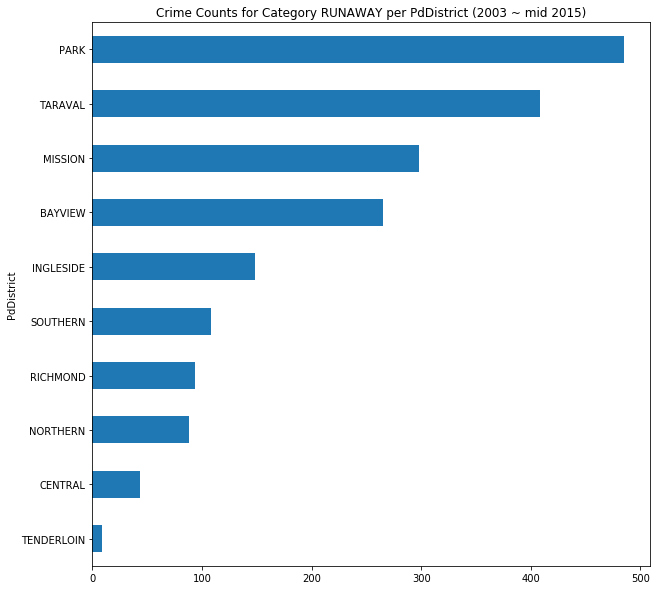

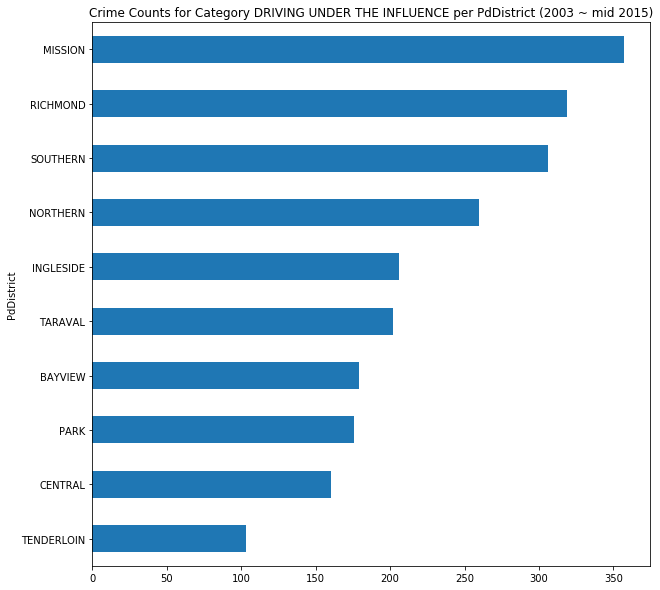

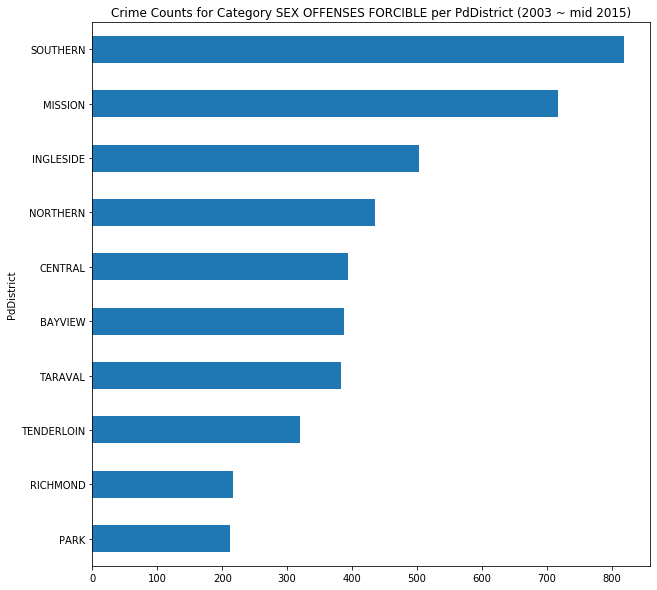

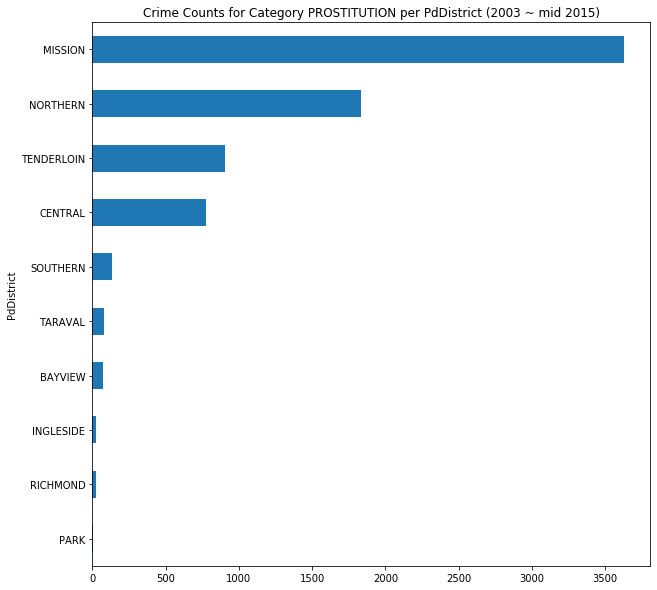

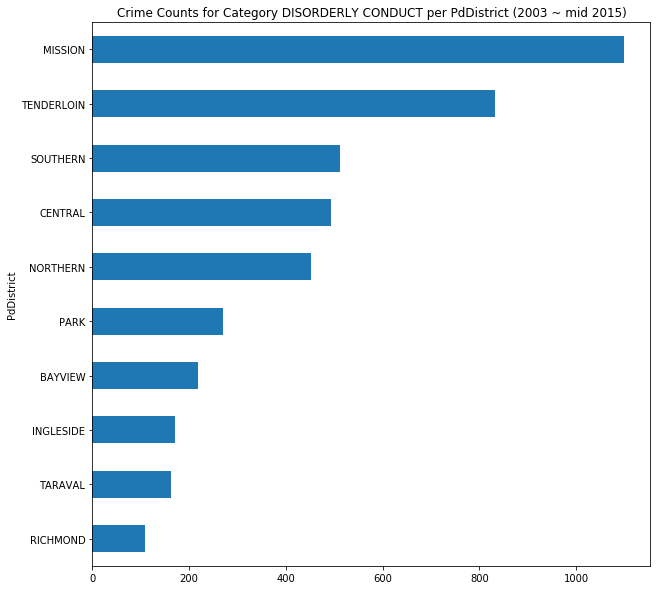

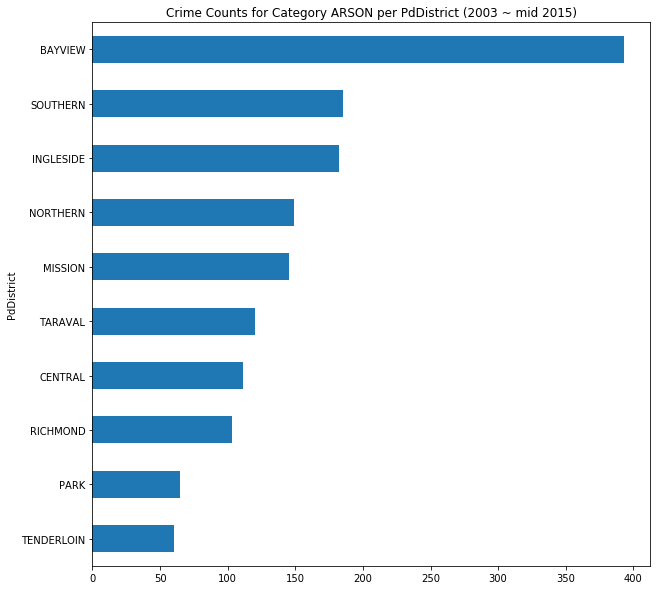

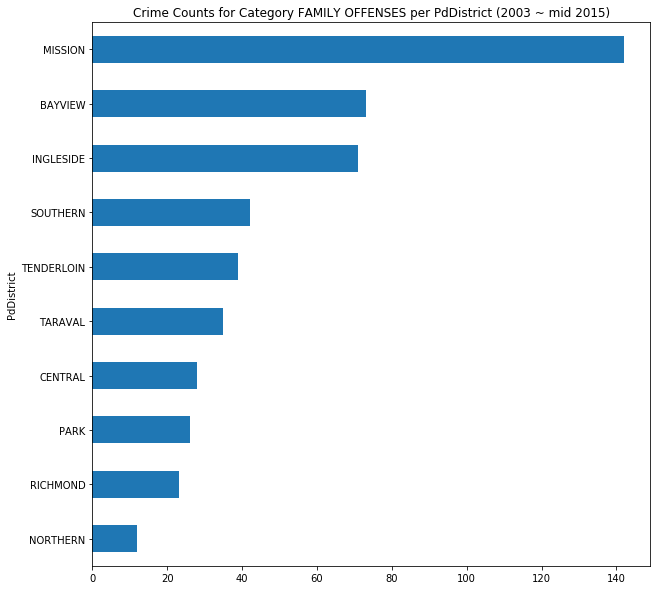

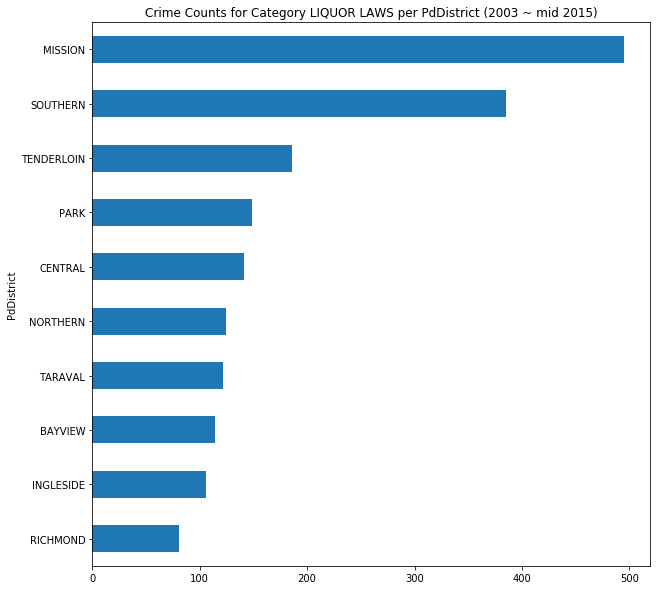

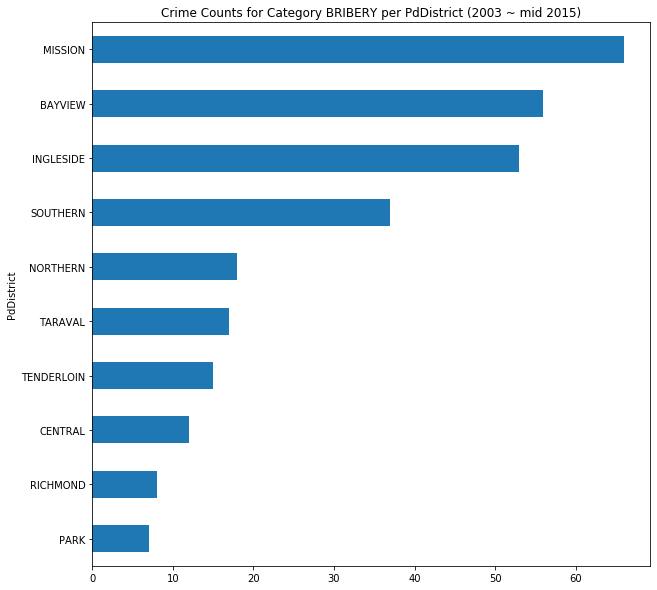

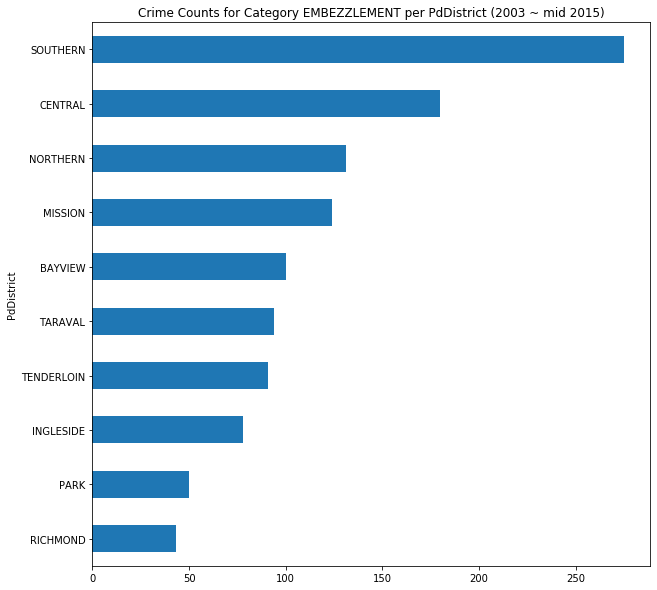

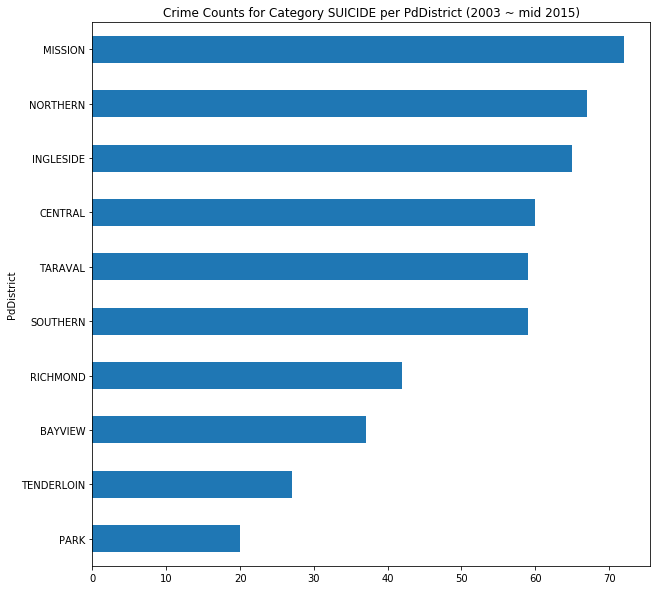

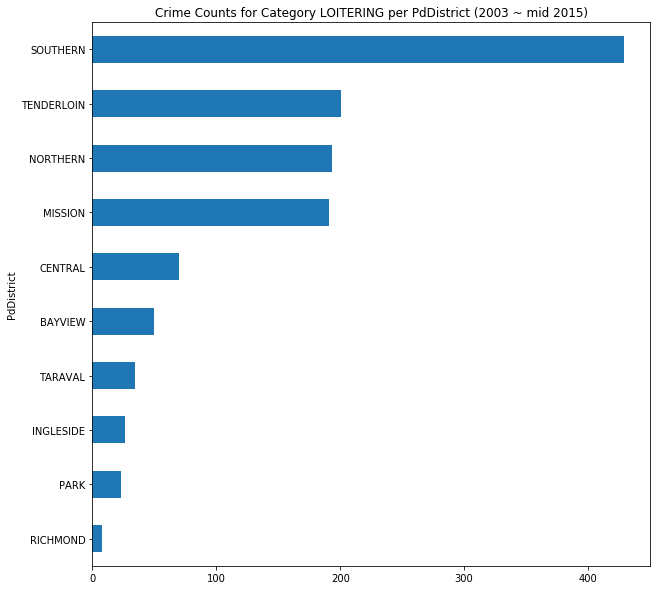

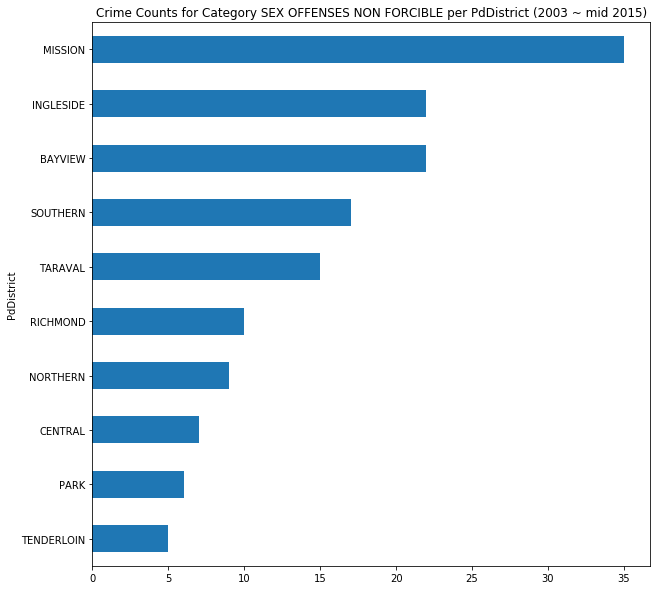

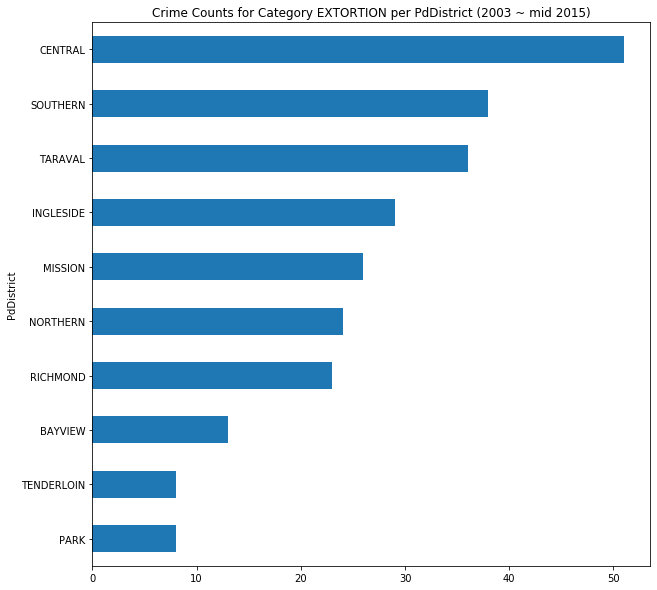

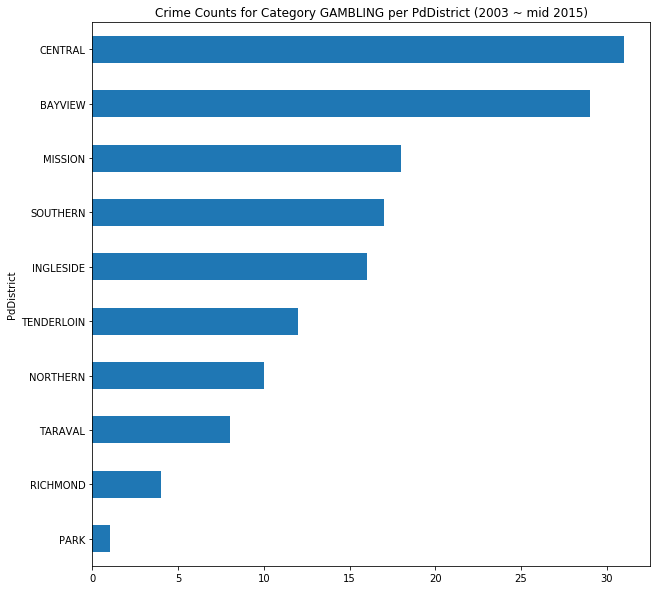

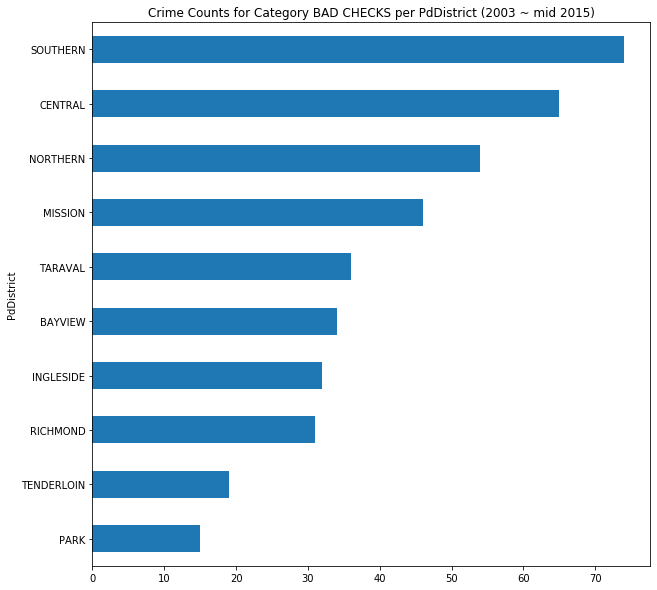

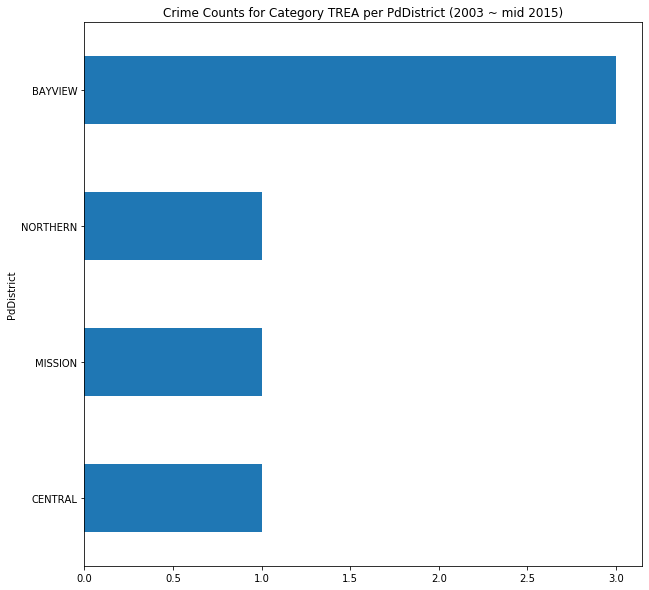

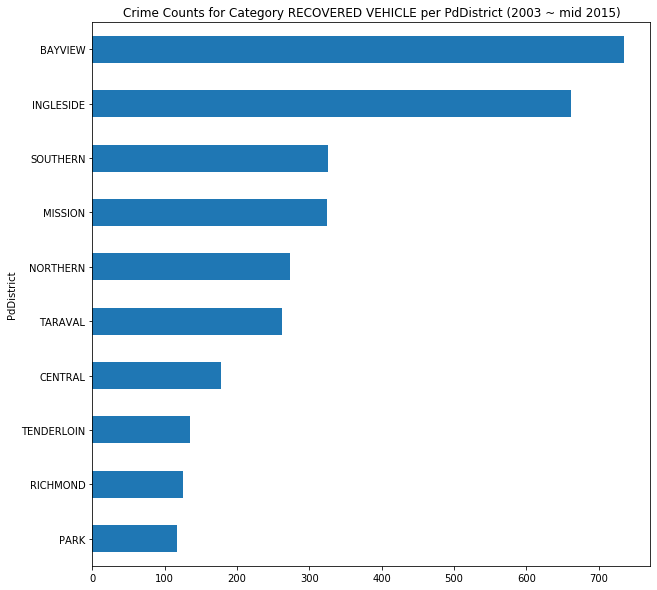

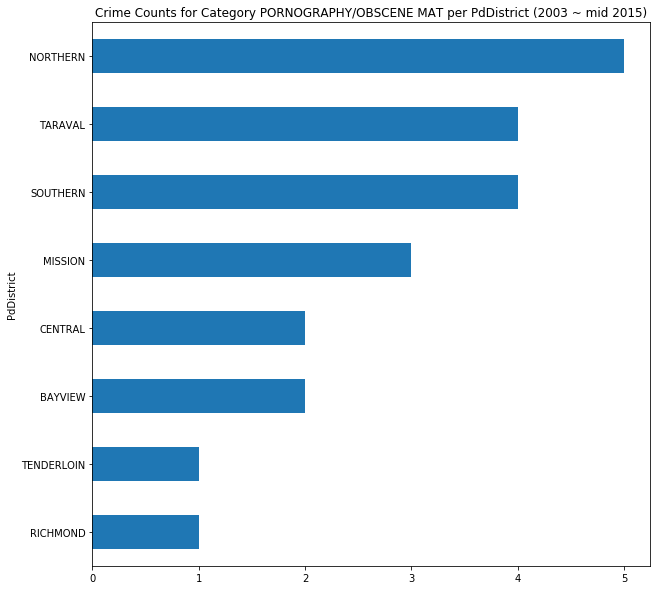

In [69]:
all_cats = train_df.Category.unique()
for c in all_cats:
    gb = train_df[train_df.Category == c].groupby('PdDistrict')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(10,10), title=f'Crime Counts for Category {c} per PdDistrict (2003 ~ mid 2015)')
    plt.show()

### Heat Map Visualizations of Thefts/Robberies/Burglaries/Kidnappings

#### From here, we can do endless visualizations, let's concentrate on few categories from last year 2014:
    - Theft/Larceny
    - Robbery
    - Burglary
    - Kidnapping


In [70]:
thefts = train_df[ (train_df.Year == 2014) & (train_df.Category == 'LARCENY/THEFT')][['Y','X']]
robberies = train_df[ (train_df.Year == 2014) & (train_df.Category == 'ROBBERY')][['Y','X']]
burglaries = train_df[ (train_df.Year == 2014) & (train_df.Category == 'BURGLARY')][['Y','X']]
kidnappings = train_df[ (train_df.Year == 2014) & (train_df.Category == 'KIDNAPPING')][['Y','X']]

#### Thefts

- From the Map below, we can see that Thefts occur a lot in the north-eastern part of the city ( CENTRAL, NORTHERN, SOUTHERN, TENDERLOIN )

In [82]:
m1 = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
HeatMap(thefts[['Y','X']].to_numpy()).add_to(m)

m1

#### Robberies

In [83]:
m2 = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
HeatMap(robberies[['Y','X']].to_numpy()).add_to(m)

m2

#### Burglaries

In [74]:
m = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
HeatMap(burglaries[['Y','X']].to_numpy()).add_to(m)

m

#### Kidnappings

In [75]:
m = folium.Map(location=city_coordinates, zoom_start=12)
folium.GeoJson('data/pddistricts.geojson').add_to(m)
for d in districts_coordinates:
    folium.Marker(districts_coordinates[d], tooltip=d).add_to(m)
HeatMap(kidnappings[['Y','X']].values).add_to(m)

m

### For more practise check out : https://www.youtube.com/watch?v=xvqsFTUsOmc&t=5560s

### Github Code For Reference : https://github.com/adashofdata/nlp-in-python-tutorial